<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/An%C3%A1lise_Explorat%C3%B3ria_%C3%93leo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Análise de Óleo**

## **Carrega Bibliotecas**

## **Instalação do Pandas Profile**

In [ ]:
#Instalando via pip 
!pip install -U pandas-profiling 

     |████████████████████████████████| 245kB 6.4MB/s 
     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 1.1MB 7.7MB/s 
     |████████████████████████████████| 3.2MB 18.5MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 296kB 38.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=2bcdbde0af29865e7bf14f58c4abe0901686cba868705ed3cd605a30b45a06ff
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=3af6b337ab262f68dfc3f20de98d7dac97bc7de66b732962737fccc8760e3c63
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but yo

## **Carrega bibliotecas**

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport

# **Adequando colunas da Planilha "analise"** 



---
## **Planilha Análise de Óleo - N.Análise,LOCO,Data da Coleta,Elementos Químicos da Análise(18 colunas)**


---






---
## **Leitura da Planilha**


---




In [ ]:
analise = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/BD-AnalisedeOleo-1.csv",sep = ';',encoding = 'latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Alterando a coluna "Data da coleta" para formato data**

In [ ]:
analise['Data da coleta']=pd.to_datetime(analise['Data da coleta'])

## **Renomenando a coluna "Data da coleta" para "DT_COLETA"**

In [ ]:
analise = analise.rename(columns={'Data da coleta': 'DT_COLETA'})

## **Substituindo valores missing da coluna "DT_COLETA" por 0**

In [ ]:
analise['DT_COLETA'].replace({pd.NaT: 0}, inplace=True)

In [ ]:
print(analise['DT_COLETA'])

0         06/01/2003
1         06/01/2003
2         06/02/2003
3         16/02/2003
4         18/02/2003
             ...    
175957    09/11/2020
175958    10/11/2020
175959    10/11/2020
175960             0
175961             0
Name: DT_COLETA, Length: 175962, dtype: object


## **Teste comando lambda**

In [ ]:
analise.apply(lambda row:1 if(row['DT_COLETA']-row['DT_COLETA']).days==0 else 0,axis=1)

0         1
1         1
2         1
3         1
4         1
         ..
175957    1
175958    1
175959    1
175960    0
175961    0
Length: 175962, dtype: int64

## **Printando dimensões e colunas da planilha analise**

In [ ]:
print(analise.shape)
analise.head()

(175962, 28)


,NU_ANLS_OLEO,LOCO,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL diluído <1 não,"VISC_CST lim sup 18,5 e inf 12,6 (oleo bom)",AGUA,INSOLUVEL,TBN,FULIGEM,OXIDACAO,SULFATACAO,OUTLIER resultado,DataC4 - trocou motor,C4 coletada depois da troca do motor,Código amostra,NumOS,Target,Unnamed: 27
0,191,903201,06/01/2003,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,80,0,3,5,NaN,NaN,NaN,191-APROVADA,NaN,-,191,NaN,NaN,NaN
1,190,903201,06/01/2003,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,20,"0,3",40,50,NaN,NaN,NaN,190-APROVADA,NaN,-,190,NaN,NaN,NaN
2,244,903247,06/02/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"4,9",NaN,NaN,NaN,NaN,244-REPROVADA,NaN,-,244,NaN,NaN,NaN
3,2539,903279,16/02/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,81,0,NaN,NaN,NaN,NaN,NaN,2539-APROVADA,NaN,-,2539,NaN,NaN,NaN
4,506,903395,18/02/2003,"1,8","4,68","1,13","2,96","2,72",0,"0,91","0,13","2,45","2,37",N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506-APROVADA,NaN,-,506,NaN,NaN,NaN


In [ ]:
analise.columns

Index(['NU_ANLS_OLEO', 'LOCO', 'DT_COLETA', 'ALUMINIO', 'FERRO', 'CROMO',
       'CHUMBO', 'COBRE', 'ESTANHO', 'NIQUEL', 'PRATA', 'SILICIO', 'SODIO',
       'DIESEL diluído <1 não ', 'VISC_CST lim sup 18,5 e inf 12,6 (oleo bom)',
       'AGUA', 'INSOLUVEL', 'TBN', 'FULIGEM', 'OXIDACAO', 'SULFATACAO',
       'OUTLIER resultado', 'DataC4 - trocou motor',
       'C4 coletada depois da troca do motor', 'Código amostra', 'NumOS',
       'Target', 'Unnamed: 27'],
      dtype='object')

## **Deletando colunas que não interferem no resultado**

In [ ]:
del analise['OUTLIER resultado']
del analise['DataC4 - trocou motor']
del analise['C4 coletada depois da troca do motor']
del analise['Código amostra']
del analise['NumOS']

In [ ]:
analise.columns

Index(['NU_ANLS_OLEO', 'LOCO', 'DT_COLETA', 'ALUMINIO', 'FERRO', 'CROMO',
       'CHUMBO', 'COBRE', 'ESTANHO', 'NIQUEL', 'PRATA', 'SILICIO', 'SODIO',
       'DIESEL diluído <1 não ', 'VISC_CST lim sup 18,5 e inf 12,6 (oleo bom)',
       'AGUA', 'INSOLUVEL', 'TBN', 'FULIGEM', 'OXIDACAO', 'SULFATACAO',
       'Target', 'Unnamed: 27'],
      dtype='object')

In [ ]:
del analise['Unnamed: 27']

In [ ]:
analise = analise.rename(columns={'DIESEL diluído <1 não ': 'DIESEL'})
analise = analise.rename(columns={'VISC_CST lim sup 18,5 e inf 12,6 (oleo bom)': 'VISCOSIDADE'})
#analise = analise.rename(columns={'Data da coleta':'COLETA'})
analise = analise.rename(columns={'LOCO':'LOCO_analise'})

## **Alterando o nome da coluna"DIESEL diluído <1 não" por "DIESEL"**

In [ ]:
analise.rename(columns={'DIESEL diluído <1 não ': 'DIESEL'})

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,INSOLUVEL,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target
0,191,903201,2003-06-01,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,80,0,3,5,NaN,NaN,NaN,NaN
1,190,903201,2003-06-01,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,20,"0,3",40,50,NaN,NaN,NaN,NaN
2,244,903247,2003-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"4,9",NaN,NaN,NaN,NaN,NaN
3,2539,903279,2003-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,81,0,NaN,NaN,NaN,NaN,NaN,NaN
4,506,903395,2003-02-18,"1,8","4,68","1,13","2,96","2,72",0,"0,91","0,13","2,45","2,37",N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175957,2000310037,903418,2020-09-11,1,19,1,2,2,0,0,0,7,10,< 1,"17,84","0,002307","1,2","4,389","0,92","0,21","0,33",NaN
175958,2000289480,907315,2020-10-11,2,16,1,6,2,0,0,0,7,5,< 1,"17,42","0,002323",-,"6,728","0,62","0,22","0,29",NaN
175959,2000336792,903774,2020-10-11,2,18,2,8,9,0,0,0,9,5,< 1,"17,3","0,002618",2,"6,654","1,19","0,26","0,32",NaN
175960,2000089698,903879,NaT,5,11,3,1,1,0,0,0,5,6,<1,"15,95","0,001999",-,"6,373","0,53","0,14","0,23",NaN


## **Deletando a coluna "INSOLUVEL"**

In [ ]:
del analise['INSOLUVEL']

In [ ]:
analise.columns

Index(['NU_ANLS_OLEO', 'LOCO_analise', 'DT_COLETA', 'ALUMINIO', 'FERRO',
       'CROMO', 'CHUMBO', 'COBRE', 'ESTANHO', 'NIQUEL', 'PRATA', 'SILICIO',
       'SODIO', 'DIESEL', 'VISCOSIDADE', 'AGUA', 'TBN', 'FULIGEM', 'OXIDACAO',
       'SULFATACAO', 'Target'],
      dtype='object')

In [ ]:
analise['DT_COLETA']= pd.to_datetime(analise['DT_COLETA'])
analise.dtypes

NU_ANLS_OLEO            object
LOCO_analise             int64
DT_COLETA       datetime64[ns]
ALUMINIO                object
FERRO                   object
CROMO                   object
CHUMBO                  object
COBRE                   object
ESTANHO                 object
NIQUEL                  object
PRATA                   object
SILICIO                 object
SODIO                   object
DIESEL                  object
VISCOSIDADE             object
AGUA                    object
TBN                     object
FULIGEM                 object
OXIDACAO                object
SULFATACAO              object
Target                  object
dtype: object

# **Salvando a planilha analise**

In [ ]:
analise = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(analise.shape)

(175962, 21)


In [ ]:
analise.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise.csv',index=False)

# **Filtrando a planilha analise para datas posteriores a 31/12/2016**

In [ ]:
selecao = (analise['DT_COLETA'] > '31-12-2016')
analise2 = analise[selecao]
print(analise2.shape)

(40340, 21)


In [ ]:
analise2.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target
135620,181705,907313,2017-01-01,"1,39","8,25","0,09",NaN,"0,6",0,0,0,"6,83","2,48",N,"15,91",0,"8,43","0,1","0,2","0,22",NaN
135621,181543,907337,2017-01-01,"1,58","10,58","0,9","4,39","1,74",0,0,"0,04","4,61","2,74",N,"16,53",0,"8,05","0,31","0,23","0,32",NaN
135622,181542,903450,2017-01-01,"1,68","9,5","0,44","3,18","1,24",0,0,"0,07","5,46","12,26",N,18,0,NaN,"0,38","0,38","0,39",NaN
135623,181391,903969,2017-01-01,"1,69","8,5","0,02","1,92","1,3",0,"0,36","0,05",7,"24,67",N,"16,26",0,"12,16","0,17","0,22","0,24",NaN
135624,181541,903833,2017-01-01,"1,7","9,6","2,3","2,15","1,38",0,0,"0,05","5,08","5,17",N,"17,32",0,"5,81","0,67","0,33","0,4",NaN


In [ ]:
analise2 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise2.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise.sort_values(by=['LOCO_analise'])

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target
42614,76290,900051,01/03/2010,"3,49","28,24","3,51","2,91","22,07",0,"0,54","0,06","5,17","52,93",N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42615,76288,900051,01/03/2010,"3,6","31,77","3,92","3,67","23,88",0,"0,46","0,1","5,48","52,09",N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42664,76289,900204,04/03/2010,"2,94","7,72","0,13","3,13","3,49",0,"0,08","0,01","5,57","5,38",N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51954,88828,900751,22/10/2010,"1,77","16,25","0,92","2,82","1,81","0,09","0,55","0,03","7,39","10,94",N,"15,61",0,NaN,"0,29","0,04","0,06",NaN
140262,187153,900952,25/05/2017,"2,29","17,35","1,21","2,76","4,3",0,"0,62","0,08","5,15","3,81",N,"15,94",0,"6,89","0,29","0,2","0,26",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144056,190635,907352,18/09/2017,"1,43","7,09","0,91","2,86","13,24",0,"1,96","0,12","14,67","7,06",N,"14,57",0,"11,83","0,06","0,16","0,15",NaN
172758,2000005057,907352,05/07/2020,0,4,0,0,0,0,0,0,2,3,< 1,"14,5","0,001242","9,661","0,12","0,09","0,15",NaN
147285,193455,907352,29/12/2017,"1,5","5,2","0,1","2,1","4,8",0,0,0,"4,9","5,3",N,"14,62",0,"7,1",0,"0,12","0,11",NaN
145685,191981,907352,10/11/2017,"2,2","12,44","0,75","4,06","14,56",0,"0,57","0,07","20,81","7,86",N,"14,25",0,"5,3","0,21","0,17","0,21",NaN


In [ ]:
analise2.sort_values(by=['LOCO_analise'])

NameError: ignored

In [ ]:
analise.isna().sum()

NU_ANLS_OLEO         0
LOCO_analise         0
DT_COLETA            0
ALUMINIO          1547
FERRO             1788
CROMO             1553
CHUMBO            7181
COBRE             1904
ESTANHO           2153
NIQUEL            3394
PRATA             3898
SILICIO           1701
SODIO             1702
DIESEL             163
VISCOSIDADE      60842
AGUA             24112
TBN             112349
FULIGEM          34963
OXIDACAO         36353
SULFATACAO       36791
Target          175933
dtype: int64

In [ ]:
analise2.isna().sum()

NU_ANLS_OLEO        0
LOCO_analise        0
DT_COLETA           0
ALUMINIO            5
FERRO              30
CROMO               6
CHUMBO            564
COBRE              21
ESTANHO            10
NIQUEL            281
PRATA              37
SILICIO             5
SODIO               8
DIESEL            163
VISCOSIDADE        52
AGUA              286
TBN              7623
FULIGEM            46
OXIDACAO           56
SULFATACAO        309
Target          40311
dtype: int64

In [ ]:
analise2.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv',index=False)

## **Salvando a planilha analise filtrada como analise2**

In [ ]:
analise.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv')

In [ ]:
analise2.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise2.csv')

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
analise2 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise2.csv",sep = ',',encoding = 'utf8')

In [ ]:
del analise_orig['Unnamed: 0']

In [ ]:
del analise2['Unnamed: 0']

In [ ]:
analise_orig.isna().sum()

NU_ANLS_OLEO         0
LOCO_analise         0
DT_COLETA            0
ALUMINIO          1547
FERRO             1788
CROMO             1553
CHUMBO            7181
COBRE             1904
ESTANHO           2153
NIQUEL            3394
PRATA             3898
SILICIO           1701
SODIO             1702
DIESEL             163
VISCOSIDADE      60842
AGUA             24112
TBN             112349
FULIGEM          34963
OXIDACAO         36353
SULFATACAO       36791
Target          175933
dtype: int64

In [ ]:
analise2.isna().sum()

NU_ANLS_OLEO        0
LOCO_analise        0
DT_COLETA           0
ALUMINIO            5
FERRO              30
CROMO               6
CHUMBO            564
COBRE              21
ESTANHO            10
NIQUEL            281
PRATA              37
SILICIO             5
SODIO               8
DIESEL            163
VISCOSIDADE        52
AGUA              286
TBN              7623
FULIGEM            46
OXIDACAO           56
SULFATACAO        309
Target          40311
dtype: int64

In [ ]:
analise_orig.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv',index=False)

In [ ]:
analise2.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise2.csv',index=False)

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
analise2 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise2.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise2.dtypes

NU_ANLS_OLEO    object
LOCO_analise     int64
DT_COLETA       object
ALUMINIO        object
FERRO           object
CROMO           object
CHUMBO          object
COBRE           object
ESTANHO         object
NIQUEL          object
PRATA           object
SILICIO         object
SODIO           object
DIESEL          object
VISCOSIDADE     object
AGUA            object
TBN             object
FULIGEM         object
OXIDACAO        object
SULFATACAO      object
Target          object
dtype: object

In [ ]:
#DATA_COLETA em ordem decrescente
analise_orig=analise_orig.sort_values(by=['DT_COLETA'], ascending=False)

In [ ]:
#DATA_COLETA em ordem decrescente
analise3=analise2.sort_values(by=['DT_COLETA'], ascending=False)

In [ ]:
analise3.isna().sum()

NU_ANLS_OLEO        0
LOCO_analise        0
DT_COLETA           0
ALUMINIO            5
FERRO              30
CROMO               6
CHUMBO            564
COBRE              21
ESTANHO            10
NIQUEL            281
PRATA              37
SILICIO             5
SODIO               8
DIESEL            163
VISCOSIDADE        52
AGUA              286
TBN              7623
FULIGEM            46
OXIDACAO           56
SULFATACAO        309
Target          40311
dtype: int64

In [ ]:
analise_orig.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv',index=False)

In [ ]:
analise3.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise3.csv',index=False)

In [ ]:
analise3.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise3.xlsx',index=False)

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise3 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise3.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
classificacao2.isna().sum()

DT_SOLICITACAO    0
LOCO              0
ASSERCAO          0
LAUDO             0
dtype: int64

## **Quantidade de valores missing por coluna por ordem decrescente**

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_orig.isnull().sum().sort_values(ascending = False)

Target          175933
TBN             112349
VISCOSIDADE      60842
SULFATACAO       36791
OXIDACAO         36353
FULIGEM          34963
AGUA             24112
CHUMBO            7181
PRATA             3898
NIQUEL            3394
ESTANHO           2153
COBRE             1904
FERRO             1788
SODIO             1702
SILICIO           1701
CROMO             1553
ALUMINIO          1547
DIESEL             163
DT_COLETA            0
LOCO_analise         0
NU_ANLS_OLEO         0
dtype: int64

In [ ]:
analise_sort.isnull().sum().sort_values(ascending = False)

Target          40311
TBN              7623
CHUMBO            564
SULFATACAO        309
AGUA              286
NIQUEL            281
DIESEL            163
OXIDACAO           56
VISCOSIDADE        52
FULIGEM            46
PRATA              37
FERRO              30
COBRE              21
ESTANHO            10
SODIO               8
CROMO               6
SILICIO             5
ALUMINIO            5
DT_COLETA           0
LOCO_analise        0
NU_ANLS_OLEO        0
dtype: int64

In [ ]:
analise_sort.dtypes

NU_ANLS_OLEO    object
LOCO_analise     int64
DT_COLETA       object
ALUMINIO        object
FERRO           object
CROMO           object
CHUMBO          object
COBRE           object
ESTANHO         object
NIQUEL          object
PRATA           object
SILICIO         object
SODIO           object
DIESEL          object
VISCOSIDADE     object
AGUA            object
TBN             object
FULIGEM         object
OXIDACAO        object
SULFATACAO      object
Target          object
dtype: object

## **Padronizando valores da coluna "DIESEL"**

In [ ]:
analise_orig['DIESEL'] = analise_orig['DIESEL'].apply({'N':0, 'S':1,'NN':0,'< 1':0,'<1':0,'> 10':1,'>10':1}.get)

In [ ]:
analise_sort['DIESEL'] = analise_sort['DIESEL'].apply({'N':0, 'S':1,'NN':0,'< 1':0,'<1':0,'> 10':1,'>10':1}.get)

## **Transformando espaços vazios em NaN na coluna 'DIESEL'**

In [ ]:
analise_orig['DIESEL'] = analise_orig['DIESEL'].replace(r'^\s+$', np.nan, regex=True)

In [ ]:
analise_sort['DIESEL'] = analise_sort['DIESEL'].replace(r'^\s+$', np.nan, regex=True)

## **Preenchendo NaN com 0 na coluna 'DIESEL'**

In [ ]:
analise_orig = analise_orig.fillna({'DIESEL': 0})

In [ ]:
analise_sort = analise_sort.fillna({'DIESEL': 0})

In [ ]:
analise_orig.isnull().sum()

NU_ANLS_OLEO         0
LOCO_analise         0
DT_COLETA            0
ALUMINIO          1547
FERRO             1788
CROMO             1553
CHUMBO            7181
COBRE             1904
ESTANHO           2153
NIQUEL            3394
PRATA             3898
SILICIO           1701
SODIO             1702
DIESEL               0
VISCOSIDADE      60842
AGUA             24112
TBN             112349
FULIGEM          34963
OXIDACAO         36353
SULFATACAO       36791
Target          175933
dtype: int64

In [ ]:
analise_sort.isnull().sum()

NU_ANLS_OLEO        0
LOCO_analise        0
DT_COLETA           0
ALUMINIO            5
FERRO              30
CROMO               6
CHUMBO            564
COBRE              21
ESTANHO            10
NIQUEL            281
PRATA              37
SILICIO             5
SODIO               8
DIESEL              0
VISCOSIDADE        52
AGUA              286
TBN              7623
FULIGEM            46
OXIDACAO           56
SULFATACAO        309
Target          40311
dtype: int64

## **Substituindo valores '-' da coluna 'TBN' por 0**

In [ ]:
analise_orig['TBN'].unique()

array(['4,969', '3,82', '5,138', ..., '3,419', '10,024', '3,937'],
      dtype=object)

In [ ]:
analise_sort['TBN'].unique()

array(['8,43', '8,05', nan, ..., '3,823', '8,635', '11,748'], dtype=object)

In [ ]:
analise_orig.shape[0]

175962

In [ ]:
cont=0
for x in range (analise_orig.shape[0]):
  if analise_orig['TBN'][x]=='-':
    analise_orig['TBN'][x]= 0
    cont=cont+1

print(cont) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


2


In [ ]:
analise_orig.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target
0,1900260869,907246,31/12/2019,0,8,1,4,2,0,1,0,9,1,0.0,"16,78","0,002013","4,969","0,62","0,17","0,27",NaN
1,1900043527,907230,31/12/2019,1,12,1,7,2,0,2,0,10,0,0.0,"16,87","0,002411","3,82","0,79","0,22","0,32",NaN
2,1900259886,907317,31/12/2019,0,24,3,12,5,0,0,0,20,0,0.0,"16,77","0,002695","5,138","0,76","0,23","0,34",NaN
3,1900287711,903951,31/12/2019,2,11,0,16,2,0,1,0,9,3,0.0,"16,09","0,00251","6,616","0,43","0,24","0,29",NaN
4,1900253706,903437,31/12/2019,0,20,1,5,2,0,0,0,16,2,0.0,"15,85","0,002492","5,939","0,62","0,19","0,3",NaN


In [ ]:
cont=0
for x in range (40340):
  if analise_sort['TBN'][x]=='-':
    analise_sort['TBN'][x]= 0
    cont=cont+1

print(cont)    

2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## **Substituindo as vírgulas por pontos na coluna 'TBN'**

In [ ]:
analise_orig['TBN']=analise_orig['TBN'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
analise_sort['TBN']=analise_sort['TBN'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
analise_orig['TBN'][34]

5.372

In [ ]:
analise_sort['TBN'][3]

12.16

In [ ]:
analise_orig.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target
0,1900260869,907246,31/12/2019,0,8,1,4,2,0,1,0,9,1,0.0,"16,78","0,002013",4.969,"0,62","0,17","0,27",NaN
1,1900043527,907230,31/12/2019,1,12,1,7,2,0,2,0,10,0,0.0,"16,87","0,002411",3.820,"0,79","0,22","0,32",NaN
2,1900259886,907317,31/12/2019,0,24,3,12,5,0,0,0,20,0,0.0,"16,77","0,002695",5.138,"0,76","0,23","0,34",NaN
3,1900287711,903951,31/12/2019,2,11,0,16,2,0,1,0,9,3,0.0,"16,09","0,00251",6.616,"0,43","0,24","0,29",NaN
4,1900253706,903437,31/12/2019,0,20,1,5,2,0,0,0,16,2,0.0,"15,85","0,002492",5.939,"0,62","0,19","0,3",NaN


## **Substituindo valores missing pela média na coluna 'TBN'**

In [ ]:
media = analise_orig['TBN'].mean()
analise_orig = analise_orig.fillna({'TBN': media})

In [ ]:
media = analise_sort['TBN'].mean()
analise_sort = analise_sort.fillna({'TBN': media})

In [ ]:
analise_sort['TBN'][3]

12.16

In [ ]:
analise_orig.isnull().sum()

NU_ANLS_OLEO         0
LOCO_analise         0
DT_COLETA            0
ALUMINIO          1547
FERRO             1788
CROMO             1553
CHUMBO            7181
COBRE             1904
ESTANHO           2153
NIQUEL            3394
PRATA             3898
SILICIO           1701
SODIO             1702
DIESEL               0
VISCOSIDADE      60842
AGUA             24112
TBN                  0
FULIGEM          34963
OXIDACAO         36353
SULFATACAO       36791
Target          175933
dtype: int64

In [ ]:
analise_sort.isnull().sum()

NU_ANLS_OLEO        0
LOCO_analise        0
DT_COLETA           0
ALUMINIO            5
FERRO              30
CROMO               6
CHUMBO            564
COBRE              21
ESTANHO            10
NIQUEL            281
PRATA              37
SILICIO             5
SODIO               8
DIESEL              0
VISCOSIDADE        52
AGUA              286
TBN                 0
FULIGEM            46
OXIDACAO           56
SULFATACAO        309
Target          40311
dtype: int64

## **Substituindo valores '-' da coluna 'VISCOSIDADE' por 0**

In [ ]:
cont=0
for x in range (analise_orig.shape[0]):
  if analise_orig['VISCOSIDADE'][x]=='-':
    analise_orig['VISCOSIDADE'][x]= 0
    cont=cont+1

print(cont) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


22


In [ ]:
cont=0
for x in range (40340):
  if analise_sort['VISCOSIDADE'][x]=='-':
    analise_sort['VISCOSIDADE'][x]= 0
    cont=cont+1

print(cont)    

22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## **Substituindo as vírgulas por pontos na coluna 'VISCOSIDADE'**

In [ ]:
analise_orig['VISCOSIDADE']=analise_orig['VISCOSIDADE'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
analise_sort['VISCOSIDADE']=analise_sort['VISCOSIDADE'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
analise_orig['VISCOSIDADE'][35]

15.73

## **Substituindo valores missing pela média na coluna 'VISCOSIDADE'**

In [ ]:
media = analise_orig['VISCOSIDADE'].mean()
analise_orig = analise_orig.fillna({'VISCOSIDADE': media})

In [ ]:
media = analise_sort['VISCOSIDADE'].mean()
analise_sort = analise_sort.fillna({'VISCOSIDADE': media})

## **Idem para demais variáveis dos elementos químicos**

In [ ]:
cont1=0;cont2=0;cont3=0;cont4=0;cont5=0;cont6=0;cont7=0;cont8=0;cont9=0;cont10=0;cont11=0;cont12=0;cont13=0;cont14=0
for x in range (analise_orig.shape[0]):
  if analise_orig['ALUMINIO'][x]=='-':
    analise_orig['ALUMINIO'][x]= 0
    cont1=cont1+1
  if analise_orig['FERRO'][x]=='-':
    analise_orig['FERRO'][x]= 0
    cont2=cont2+1  
  if analise_orig['CROMO'][x]=='-':
    analise_orig['CROMO'][x]= 0
    cont3=cont3+1
  if analise_orig['CHUMBO'][x]=='-':
    analise_orig['CHUMBO'][x]= 0
    cont4=cont4+1
  if analise_orig['COBRE'][x]=='-':
    analise_orig['COBRE'][x]= 0
    cont5=cont5+1
  if analise_orig['ESTANHO'][x]=='-':
    analise_orig['ESTANHO'][x]= 0
    cont6=cont6+1
  if analise_orig['NIQUEL'][x]=='-':
    analise_orig['NIQUEL'][x]= 0
    cont7=cont7+1
  if analise_orig['PRATA'][x]=='-':
    analise_orig['PRATA'][x]= 0
    cont8=cont8+1  
  if analise_orig['SILICIO'][x]=='-':
    analise_orig['SILICIO'][x]= 0
    cont9=cont9+1
  if analise_orig['SODIO'][x]=='-':
    analise_orig['SODIO'][x]= 0
    cont10=cont10+1
  if analise_orig['AGUA'][x]=='-':
    analise_orig['AGUA'][x]= 0
    cont11=cont11+1
  if analise_orig['FULIGEM'][x]=='-':
    analise_orig['FULIGEM'][x]= 0
    cont12=cont12+1
  if analise_orig['OXIDACAO'][x]=='-':
    analise_orig['OXIDACAO'][x]= 0
    cont13=cont13+1
  if analise_orig['SULFATACAO'][x]=='-':
    analise_orig['SULFATACAO'][x]= 0
    cont14=cont14+1                      

print(cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:

17 17 17 17 17 17 17 17 17 17 0 21 0 0


In [ ]:
cont1=0;cont2=0;cont3=0;cont4=0;cont5=0;cont6=0;cont7=0;cont8=0;cont9=0;cont10=0;cont11=0;cont12=0;cont13=0;cont14=0
for x in range (40340):
  if analise_sort['ALUMINIO'][x]=='-':
    analise_sort['ALUMINIO'][x]= 0
    cont1=cont1+1
  if analise_sort['FERRO'][x]=='-':
    analise_sort['FERRO'][x]= 0
    cont2=cont2+1  
  if analise_sort['CROMO'][x]=='-':
    analise_sort['CROMO'][x]= 0
    cont3=cont3+1
  if analise_sort['CHUMBO'][x]=='-':
    analise_sort['CHUMBO'][x]= 0
    cont4=cont4+1
  if analise_sort['COBRE'][x]=='-':
    analise_sort['COBRE'][x]= 0
    cont5=cont5+1
  if analise_sort['ESTANHO'][x]=='-':
    analise_sort['ESTANHO'][x]= 0
    cont6=cont6+1
  if analise_sort['NIQUEL'][x]=='-':
    analise_sort['NIQUEL'][x]= 0
    cont7=cont7+1
  if analise_sort['PRATA'][x]=='-':
    analise_sort['PRATA'][x]= 0
    cont8=cont8+1  
  if analise_sort['SILICIO'][x]=='-':
    analise_sort['SILICIO'][x]= 0
    cont9=cont9+1
  if analise_sort['SODIO'][x]=='-':
    analise_sort['SODIO'][x]= 0
    cont10=cont10+1
  if analise_sort['AGUA'][x]=='-':
    analise_sort['AGUA'][x]= 0
    cont11=cont11+1
  if analise_sort['FULIGEM'][x]=='-':
    analise_sort['FULIGEM'][x]= 0
    cont12=cont12+1
  if analise_sort['OXIDACAO'][x]=='-':
    analise_sort['OXIDACAO'][x]= 0
    cont13=cont13+1
  if analise_sort['SULFATACAO'][x]=='-':
    analise_sort['SULFATACAO'][x]= 0
    cont14=cont14+1                      

print(cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:

17 17 17 17 17 17 17 17 17 17 0 21 0 0


In [ ]:
analise_orig['ALUMINIO'] = analise_orig['ALUMINIO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['FERRO'] = analise_orig['FERRO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['CROMO'] = analise_orig['CROMO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['CHUMBO'] = analise_orig['CHUMBO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['COBRE'] = analise_orig['COBRE'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['ESTANHO'] = analise_orig['ESTANHO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['NIQUEL'] = analise_orig['NIQUEL'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['PRATA'] = analise_orig['PRATA'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['SILICIO'] = analise_orig['SILICIO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['SODIO'] = analise_orig['SODIO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['AGUA'] = analise_orig['AGUA'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['FULIGEM'] = analise_orig['FULIGEM'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['OXIDACAO'] = analise_orig['OXIDACAO'].replace(r'^\s+$', np.nan, regex=True)
analise_orig['SULFATACAO'] = analise_orig['SULFATACAO'].replace(r'^\s+$', np.nan, regex=True)

In [ ]:
analise_sort['ALUMINIO'] = analise_sort['ALUMINIO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['FERRO'] = analise_sort['FERRO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['CROMO'] = analise_sort['CROMO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['CHUMBO'] = analise_sort['CHUMBO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['COBRE'] = analise_sort['COBRE'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['ESTANHO'] = analise_sort['ESTANHO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['NIQUEL'] = analise_sort['NIQUEL'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['PRATA'] = analise_sort['PRATA'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['SILICIO'] = analise_sort['SILICIO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['SODIO'] = analise_sort['SODIO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['AGUA'] = analise_sort['AGUA'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['FULIGEM'] = analise_sort['FULIGEM'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['OXIDACAO'] = analise_sort['OXIDACAO'].replace(r'^\s+$', np.nan, regex=True)
analise_sort['SULFATACAO'] = analise_sort['SULFATACAO'].replace(r'^\s+$', np.nan, regex=True)

In [ ]:
analise_orig['ALUMINIO']=analise_orig['ALUMINIO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['FERRO']=analise_orig['FERRO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['CROMO']=analise_orig['CROMO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['CHUMBO']=analise_orig['CHUMBO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['COBRE']=analise_orig['COBRE'].astype(str).str.replace("," , ".").astype(float)
analise_orig['ESTANHO']=analise_orig['ESTANHO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['NIQUEL']=analise_orig['NIQUEL'].astype(str).str.replace("," , ".").astype(float)
analise_orig['PRATA']=analise_orig['PRATA'].astype(str).str.replace("," , ".").astype(float)
analise_orig['SILICIO']=analise_orig['SILICIO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['SODIO']=analise_orig['SODIO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['AGUA']=analise_orig['AGUA'].astype(str).str.replace("," , ".").astype(float)
analise_orig['FULIGEM']=analise_orig['FULIGEM'].astype(str).str.replace("," , ".").astype(float)
analise_orig['OXIDACAO']=analise_orig['OXIDACAO'].astype(str).str.replace("," , ".").astype(float)
analise_orig['SULFATACAO']=analise_orig['SULFATACAO'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
analise_sort['ALUMINIO']=analise_sort['ALUMINIO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['FERRO']=analise_sort['FERRO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['CROMO']=analise_sort['CROMO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['CHUMBO']=analise_sort['CHUMBO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['COBRE']=analise_sort['COBRE'].astype(str).str.replace("," , ".").astype(float)
analise_sort['ESTANHO']=analise_sort['ESTANHO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['NIQUEL']=analise_sort['NIQUEL'].astype(str).str.replace("," , ".").astype(float)
analise_sort['PRATA']=analise_sort['PRATA'].astype(str).str.replace("," , ".").astype(float)
analise_sort['SILICIO']=analise_sort['SILICIO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['SODIO']=analise_sort['SODIO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['AGUA']=analise_sort['AGUA'].astype(str).str.replace("," , ".").astype(float)
analise_sort['FULIGEM']=analise_sort['FULIGEM'].astype(str).str.replace("," , ".").astype(float)
analise_sort['OXIDACAO']=analise_sort['OXIDACAO'].astype(str).str.replace("," , ".").astype(float)
analise_sort['SULFATACAO']=analise_sort['SULFATACAO'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
analise_orig['DT_COLETA'].head(30)

0     31/12/2019
1     31/12/2019
2     31/12/2019
3     31/12/2019
4     31/12/2019
5     31/12/2019
6     31/12/2019
7     31/12/2019
8     31/12/2019
9     31/12/2019
10    31/12/2019
11    31/12/2019
12    31/12/2019
13    31/12/2019
14    31/12/2019
15    31/12/2019
16    31/12/2019
17    31/12/2019
18    31/12/2018
19    31/12/2018
20    31/12/2018
21    31/12/2018
22    31/12/2018
23    31/12/2018
24    31/12/2018
25    31/12/2018
26    31/12/2018
27    31/12/2018
28    31/12/2018
29    31/12/2018
Name: DT_COLETA, dtype: object

In [ ]:
analise_sort['NIQUEL'].head(30)

0     0.00
1     0.00
2     0.00
3     0.36
4     0.00
5     0.63
6     0.24
7     0.73
8     1.18
9     0.46
10    0.00
11    0.62
12    0.32
13    0.00
14    0.83
15    0.00
16    0.82
17    1.37
18    0.54
19    0.21
20    0.25
21    0.64
22    0.31
23    0.43
24    1.06
25    0.33
26    0.66
27    0.82
28    0.74
29    0.11
Name: NIQUEL, dtype: float64

## **Substituindo valores NaN pela média**

In [ ]:
media = analise_orig['ALUMINIO'].mean()
analise_orig = analise_orig.fillna({'ALUMINIO': media})
media = analise_orig['FERRO'].mean()
analise_orig = analise_orig.fillna({'FERRO': media})
media = analise_orig['CROMO'].mean()
analise_orig = analise_orig.fillna({'CROMO': media})
media = analise_orig['CHUMBO'].mean()
analise_orig = analise_orig.fillna({'CHUMBO': media})
media = analise_orig['COBRE'].mean()
analise_orig = analise_orig.fillna({'COBRE': media})
media = analise_orig['ESTANHO'].mean()
analise_orig = analise_orig.fillna({'ESTANHO': media})
media = analise_orig['NIQUEL'].mean()
analise_orig = analise_orig.fillna({'NIQUEL': media})
media = analise_orig['PRATA'].mean()
analise_orig = analise_orig.fillna({'PRATA': media})
media = analise_orig['SILICIO'].mean()
analise_orig = analise_orig.fillna({'SILICIO': media})
media = analise_orig['SODIO'].mean()
analise_orig = analise_orig.fillna({'SODIO': media})
media = analise_orig['AGUA'].mean()
analise_orig = analise_orig.fillna({'AGUA': media})
media = analise_orig['FULIGEM'].mean()
analise_orig = analise_orig.fillna({'FULIGEM': media})
media = analise_orig['OXIDACAO'].mean()
analise_orig = analise_orig.fillna({'OXIDACAO': media})
media = analise_orig['SULFATACAO'].mean()
analise_orig = analise_orig.fillna({'SULFATACAO': media})

In [ ]:
media = analise_sort['ALUMINIO'].mean()
analise_sort = analise_sort.fillna({'ALUMINIO': media})
media = analise_sort['FERRO'].mean()
analise_sort = analise_sort.fillna({'FERRO': media})
media = analise_sort['CROMO'].mean()
analise_sort = analise_sort.fillna({'CROMO': media})
media = analise_sort['CHUMBO'].mean()
analise_sort = analise_sort.fillna({'CHUMBO': media})
media = analise_sort['COBRE'].mean()
analise_sort = analise_sort.fillna({'COBRE': media})
media = analise_sort['ESTANHO'].mean()
analise_sort = analise_sort.fillna({'ESTANHO': media})
media = analise_sort['NIQUEL'].mean()
analise_sort = analise_sort.fillna({'NIQUEL': media})
media = analise_sort['PRATA'].mean()
analise_sort = analise_sort.fillna({'PRATA': media})
media = analise_sort['SILICIO'].mean()
analise_sort = analise_sort.fillna({'SILICIO': media})
media = analise_sort['SODIO'].mean()
analise_sort = analise_sort.fillna({'SODIO': media})
media = analise_sort['AGUA'].mean()
analise_sort = analise_sort.fillna({'AGUA': media})
media = analise_sort['FULIGEM'].mean()
analise_sort = analise_sort.fillna({'FULIGEM': media})
media = analise_sort['OXIDACAO'].mean()
analise_sort = analise_sort.fillna({'OXIDACAO': media})
media = analise_sort['SULFATACAO'].mean()
analise_sort = analise_sort.fillna({'SULFATACAO': media})

In [ ]:
analise_orig.isnull().sum()

NU_ANLS_OLEO         0
LOCO_analise         0
DT_COLETA            0
ALUMINIO             0
FERRO                0
CROMO                0
CHUMBO               0
COBRE                0
ESTANHO              0
NIQUEL               0
PRATA                0
SILICIO              0
SODIO                0
DIESEL               0
VISCOSIDADE          0
AGUA                 0
TBN                  0
FULIGEM              0
OXIDACAO             0
SULFATACAO           0
Target          175933
dtype: int64

In [ ]:
analise_orig.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target
0,1900260869,907246,31/12/2019,0.0,8.0,1.0,4.0,2.0,0.0,1.0,0.0,9.0,1.0,0.0,16.78,0.002013,4.969,0.62,0.17,0.27,NaN
1,1900043527,907230,31/12/2019,1.0,12.0,1.0,7.0,2.0,0.0,2.0,0.0,10.0,0.0,0.0,16.87,0.002411,3.820,0.79,0.22,0.32,NaN
2,1900259886,907317,31/12/2019,0.0,24.0,3.0,12.0,5.0,0.0,0.0,0.0,20.0,0.0,0.0,16.77,0.002695,5.138,0.76,0.23,0.34,NaN
3,1900287711,903951,31/12/2019,2.0,11.0,0.0,16.0,2.0,0.0,1.0,0.0,9.0,3.0,0.0,16.09,0.002510,6.616,0.43,0.24,0.29,NaN
4,1900253706,903437,31/12/2019,0.0,20.0,1.0,5.0,2.0,0.0,0.0,0.0,16.0,2.0,0.0,15.85,0.002492,5.939,0.62,0.19,0.30,NaN


In [ ]:
analise_sort.isnull().sum()

NU_ANLS_OLEO        0
LOCO_analise        0
DT_COLETA           0
ALUMINIO            0
FERRO               0
CROMO               0
CHUMBO              0
COBRE               0
ESTANHO             0
NIQUEL              0
PRATA               0
SILICIO             0
SODIO               0
DIESEL              0
VISCOSIDADE         0
AGUA                0
TBN                 0
FULIGEM             0
OXIDACAO            0
SULFATACAO          0
Target          40311
dtype: int64

In [ ]:
analise_sort = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.xlsx")

In [ ]:
analise_orig.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv',index=False)

In [ ]:
analise_sort.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv',index=False)

In [ ]:
analise_sort.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.xlsx',index=False)

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(analise_orig)

175962

In [ ]:
del analise_sort['NIQUEL']

In [ ]:
analise_orig.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO
0,1900260869,907246,31/12/2019,0.0,8.0,1.0,4.0,2.0,0.0,0.0,9.0,1.0,0.0,16.78,0.002013,4.969,0.62,0.17,0.27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900043527,907230,31/12/2019,1.0,12.0,1.0,7.0,2.0,0.0,0.0,10.0,0.0,0.0,16.87,0.002411,3.820,0.79,0.22,0.32,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900259886,907317,31/12/2019,0.0,24.0,3.0,12.0,5.0,0.0,0.0,20.0,0.0,0.0,16.77,0.002695,5.138,0.76,0.23,0.34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900287711,903951,31/12/2019,2.0,11.0,0.0,16.0,2.0,0.0,0.0,9.0,3.0,0.0,16.09,0.002510,6.616,0.43,0.24,0.29,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900253706,903437,31/12/2019,0.0,20.0,1.0,5.0,2.0,0.0,0.0,16.0,2.0,0.0,15.85,0.002492,5.939,0.62,0.19,0.30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
analise_orig.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv',index=False)

In [ ]:
analise_sort.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv',index=False)

In [ ]:
analise_sort.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.xlsx',index=False)

In [ ]:
analise_sort = pd.read_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.xlsx')

In [ ]:
analise_sort.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv', index = None, header=True)

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
analise_orig['TX_ALUMINIO']=0
analise_orig['TX_FERRO']=0
analise_orig['TX_CROMO']=0
analise_orig['TX_CHUMBO']=0
analise_orig['TX_COBRE']=0
analise_orig['TX_ESTANHO']=0
analise_orig['TX_PRATA']=0
analise_orig['TX_SILICIO']=0
analise_orig['TX_SODIO']=0
analise_orig['LIM_DIESEL']=0
analise_orig['LIM_VISCOSIDADE']=0
analise_orig['LIM_AGUA']=0
analise_orig['LIM_TBN']=0
analise_orig['LIM_FULIGEM']=0
analise_orig['LIM_OXIDACAO']=0
analise_orig['LIM_SULFATACAO']=0


In [ ]:
analise_orig.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO
0,1900260869,907246,31/12/2019,0.0,8.0,1.0,4.0,2.0,0.0,0.0,9.0,1.0,0.0,16.78,0.002013,4.969,0.62,0.17,0.27,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1900043527,907230,31/12/2019,1.0,12.0,1.0,7.0,2.0,0.0,0.0,10.0,0.0,0.0,16.87,0.002411,3.820,0.79,0.22,0.32,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1900259886,907317,31/12/2019,0.0,24.0,3.0,12.0,5.0,0.0,0.0,20.0,0.0,0.0,16.77,0.002695,5.138,0.76,0.23,0.34,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1900287711,903951,31/12/2019,2.0,11.0,0.0,16.0,2.0,0.0,0.0,9.0,3.0,0.0,16.09,0.002510,6.616,0.43,0.24,0.29,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1900253706,903437,31/12/2019,0.0,20.0,1.0,5.0,2.0,0.0,0.0,16.0,2.0,0.0,15.85,0.002492,5.939,0.62,0.19,0.30,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
analise_sort.rename(columns={'TX_TBN': 'LIM_TBN'})

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target,"(7, 'TX_SODIO')",TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO
0,187153,900952,2017-05-25,2.29,17.35,1.21,2.76,4.30,0.00,0.08,5.15,3.81,0,15.94,0.000000,6.890000,0.29,0.2000,0.260000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,15.94,0.000000,0.000000,0.29,0.2000,0.260000
1,189287,900952,2017-07-29,1.72,17.38,1.02,0.68,4.77,0.00,0.00,4.69,3.73,0,16.04,0.000000,6.158954,0.24,0.2100,0.260000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,16.04,0.000000,0.000000,0.24,0.2100,0.260000
2,193103,900952,2017-09-29,1.87,18.93,1.44,0.71,5.25,0.00,0.02,5.72,4.16,0,16.20,0.000000,6.158954,0.30,0.2300,0.280000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,16.20,0.000000,0.000000,0.30,0.2300,0.280000
3,193717,900952,2017-11-20,2.60,18.20,1.90,2.90,5.50,0.00,0.10,5.70,5.10,0,16.00,0.000000,6.158954,0.21,0.1900,0.250000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,16.00,0.000000,0.000000,0.21,0.1900,0.250000
4,2000290046,900952,2020-10-15,1.00,8.00,7.00,1.00,2.00,0.00,0.00,4.00,6.00,0,15.17,0.002512,10.005000,0.11,0.0800,0.150000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,15.17,0.002512,0.000000,0.11,0.0800,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40335,R-97404,907352,2020-09-04,2.02,4.05,0.16,0.78,0.35,0.35,0.00,2.85,2.99,0,14.85,0.001285,6.158954,0.10,0.0433,0.270628,NaN,0.078125,-0.021263,-0.011053,-0.001684,-0.008211,-0.003684,-0.003684,0.0,-0.008947,0.042211,0,14.85,0.001285,0.038611,0.10,0.0433,0.270628
40336,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,3.00,5.00,0,14.89,0.001158,9.814000,0.30,0.1000,0.160000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,14.89,0.001158,0.000000,0.30,0.1000,0.160000
40337,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,5.00,6.00,0,15.06,0.001474,9.745000,0.09,0.1300,0.180000,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,15.06,0.001474,0.000000,0.09,0.1300,0.180000
40338,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,2.55,1.87,0,14.73,0.001285,6.158954,0.20,0.0343,0.270628,NaN,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,14.73,0.001285,0.000000,0.20,0.0343,0.270628


In [ ]:
analise_orig.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv', index = None, header=True)

In [ ]:
analise_sort.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv', index = None, header=True)

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

In [ ]:
#analise_sort.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv',index=False)
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
a=analise_orig['LOCO_analise'].unique()
len(a)

898

In [ ]:
a=analise_sort['LOCO_analise'].unique()
len(a)

683

In [ ]:
analise_orig['TX_ALUMINIO'] = analise_orig['TX_ALUMINIO'].astype(float)
analise_orig['TX_FERRO'] = analise_orig['TX_FERRO'].astype(float)
analise_orig['TX_CROMO'] = analise_orig['TX_CROMO'].astype(float)
analise_orig['TX_CHUMBO'] = analise_orig['TX_CHUMBO'].astype(float)
analise_orig['TX_COBRE'] = analise_orig['TX_COBRE'].astype(float)
analise_orig['TX_ESTANHO'] = analise_orig['TX_ESTANHO'].astype(float)
analise_orig['TX_PRATA'] = analise_orig['TX_PRATA'].astype(float)
analise_orig['TX_SILICIO'] = analise_orig['TX_SILICIO'].astype(float)
analise_orig['TX_SODIO'] = analise_orig['TX_SODIO'].astype(float)
analise_orig['LIM_DIESEL'] = analise_orig['LIM_DIESEL'].astype(float)
analise_orig['LIM_VISCOSIDADE'] = analise_orig['LIM_VISCOSIDADE'].astype(float)
analise_orig['LIM_AGUA'] = analise_orig['LIM_AGUA'].astype(float)
analise_orig['LIM_TBN'] = analise_orig['LIM_TBN'].astype(float)
analise_orig['LIM_FULIGEM'] = analise_orig['LIM_FULIGEM'].astype(float)
analise_orig['LIM_OXIDACAO'] = analise_orig['LIM_OXIDACAO'].astype(float)
analise_orig['LIM_SULFATACAO'] = analise_orig['LIM_SULFATACAO'].astype(float)








In [ ]:
analise_orig.dtypes

NU_ANLS_OLEO        object
LOCO_analise         int64
DT_COLETA           object
ALUMINIO           float64
FERRO              float64
CROMO              float64
CHUMBO             float64
COBRE              float64
ESTANHO            float64
PRATA              float64
SILICIO            float64
SODIO              float64
DIESEL             float64
VISCOSIDADE        float64
AGUA               float64
TBN                float64
FULIGEM            float64
OXIDACAO           float64
SULFATACAO         float64
Target              object
TX_ALUMINIO        float64
TX_FERRO           float64
TX_CROMO           float64
TX_CHUMBO          float64
TX_COBRE           float64
TX_ESTANHO         float64
TX_PRATA           float64
TX_SILICIO         float64
TX_SODIO           float64
LIM_DIESEL         float64
LIM_VISCOSIDADE    float64
LIM_AGUA           float64
LIM_TBN            float64
LIM_FULIGEM        float64
LIM_OXIDACAO       float64
LIM_SULFATACAO     float64
dtype: object

In [ ]:
analise_sort.dtypes

NU_ANLS_OLEO        object
LOCO_analise         int64
DT_COLETA           object
ALUMINIO           float64
FERRO              float64
CROMO              float64
CHUMBO             float64
COBRE              float64
ESTANHO            float64
PRATA              float64
SILICIO            float64
SODIO              float64
DIESEL               int64
VISCOSIDADE        float64
AGUA               float64
TBN                float64
FULIGEM            float64
OXIDACAO           float64
SULFATACAO         float64
Target              object
(7, 'TX_SODIO')    float64
TX_ALUMINIO        float64
TX_FERRO           float64
TX_CROMO           float64
TX_CHUMBO          float64
TX_COBRE           float64
TX_ESTANHO         float64
TX_PRATA           float64
TX_SILICIO         float64
TX_SODIO           float64
LIM_DIESEL         float64
LIM_VISCOSIDADE    float64
LIM_AGUA           float64
TX_TBN             float64
LIM_FULIGEM        float64
LIM_OXIDACAO       float64
LIM_SULFATACAO     float64
d

In [ ]:
analise_orig.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv', index = None, header=True)

In [ ]:
analise_sort.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv', index = None, header=True)

In [ ]:
analise_orig1 = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.xlsx")
analise_orig1.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv")

In [ ]:
analise_orig1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
analise_orig.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.xlsx',index=False)

In [ ]:
analise_orig['DT_COLETA'].head()

0    31/12/2019
1    31/12/2019
2    31/12/2019
3    31/12/2019
4    31/12/2019
Name: DT_COLETA, dtype: object

In [ ]:
analise_orig.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv', index = None, header=True)

In [ ]:
analise_orig = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_orig.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig.xlsx',index=False)

In [ ]:
#analise_orig['DT_COLETA']= pd.to_datetime(analise_orig['DT_COLETA'],format='%d-%m-%Y', errors='coerce',dayfirst=True)
analise_orig1['DT_COLETA']= pd.to_datetime(analise_orig1['DT_COLETA'])#,format='%d-%m-%Y')

In [ ]:
analise_orig1['DT_COLETA'].head()

0   2019-12-31
1   2019-12-31
2   2019-12-31
3   2019-12-31
4   2019-12-31
Name: DT_COLETA, dtype: datetime64[ns]

In [ ]:
analise_sort['DT_COLETA']= pd.to_datetime(analise_sort['DT_COLETA'])

In [ ]:
analise_orig1.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv', index = None, header=True)

In [3]:
analise_orig1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
analise_orig1.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO
0,13956,909040,2005-03-23,2.79,134.28,10.87,29.50,194.00,10.64,0.00,4.27,0.37,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787
1,2000292946,907352,2020-12-08,0.00,3.00,0.00,0.00,0.00,0.00,0.00,2.00,7.00,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000,NaN,-0.021263,-0.011053,-0.001684,-0.008211,-0.003684,-0.003684,0.000000,-0.008947,0.042211,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000
2,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,2.55,1.87,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787,NaN,0.002258,0.003871,0.000323,0.002796,-0.000538,0.000968,-0.000215,-0.000323,0.000108,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787
3,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,5.00,6.00,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000,NaN,-0.015128,0.008718,-0.007265,-0.008376,-0.009316,-0.012906,-0.004103,0.004701,0.026496,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000
4,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,3.00,5.00,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000,NaN,0.009487,-0.007350,-0.007350,-0.012393,-0.000342,-0.011880,-0.005214,-0.012991,0.016496,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000


In [5]:
analise_orig1['TX_ALUMINIO']=0
analise_orig1['TX_FERRO']=0
analise_orig1['TX_CROMO']=0
analise_orig1['TX_CHUMBO']=0
analise_orig1['TX_COBRE']=0
analise_orig1['TX_ESTANHO']=0
analise_orig1['TX_PRATA']=0
analise_orig1['TX_SILICIO']=0
analise_orig1['TX_SODIO']=0
analise_orig1['LIM_DIESEL']=0
analise_orig1['LIM_VISCOSIDADE']=0
analise_orig1['LIM_AGUA']=0
analise_orig1['LIM_TBN']=0
analise_orig1['LIM_FULIGEM']=0
analise_orig1['LIM_OXIDACAO']=0
analise_orig1['LIM_SULFATACAO']=0

In [6]:
analise_orig1.shape[0]

175960

In [7]:
analise_orig1.dtypes

NU_ANLS_OLEO        object
LOCO_analise         int64
DT_COLETA           object
ALUMINIO           float64
FERRO              float64
CROMO              float64
CHUMBO             float64
COBRE              float64
ESTANHO            float64
PRATA              float64
SILICIO            float64
SODIO              float64
DIESEL               int64
VISCOSIDADE        float64
AGUA               float64
TBN                float64
FULIGEM            float64
OXIDACAO           float64
SULFATACAO         float64
Target              object
TX_ALUMINIO          int64
TX_FERRO             int64
TX_CROMO             int64
TX_CHUMBO            int64
TX_COBRE             int64
TX_ESTANHO           int64
TX_PRATA             int64
TX_SILICIO           int64
TX_SODIO             int64
LIM_DIESEL           int64
LIM_VISCOSIDADE      int64
LIM_AGUA             int64
LIM_TBN              int64
LIM_FULIGEM          int64
LIM_OXIDACAO         int64
LIM_SULFATACAO       int64
dtype: object

In [8]:
analise_orig1['TX_ALUMINIO'] = analise_orig1['TX_ALUMINIO'].astype(float)
analise_orig1['TX_FERRO'] = analise_orig1['TX_FERRO'].astype(float)
analise_orig1['TX_CROMO'] = analise_orig1['TX_CROMO'].astype(float)
analise_orig1['TX_CHUMBO'] = analise_orig1['TX_CHUMBO'].astype(float)
analise_orig1['TX_COBRE'] = analise_orig1['TX_COBRE'].astype(float)
analise_orig1['TX_ESTANHO'] = analise_orig1['TX_ESTANHO'].astype(float)
analise_orig1['TX_PRATA'] = analise_orig1['TX_PRATA'].astype(float)
analise_orig1['TX_SILICIO'] = analise_orig1['TX_SILICIO'].astype(float)
analise_orig1['TX_SODIO'] = analise_orig1['TX_SODIO'].astype(float)
analise_orig1['LIM_DIESEL'] = analise_orig1['LIM_DIESEL'].astype(float)
analise_orig1['LIM_VISCOSIDADE'] = analise_orig1['LIM_VISCOSIDADE'].astype(float)
analise_orig1['LIM_AGUA'] = analise_orig1['LIM_AGUA'].astype(float)
analise_orig1['LIM_TBN'] = analise_orig1['LIM_TBN'].astype(float)
analise_orig1['LIM_FULIGEM'] = analise_orig1['LIM_FULIGEM'].astype(float)
analise_orig1['LIM_OXIDACAO'] = analise_orig1['LIM_OXIDACAO'].astype(float)
analise_orig1['LIM_SULFATACAO'] = analise_orig1['LIM_SULFATACAO'].astype(float)

In [9]:
analise_orig1.shape

(175960, 36)

In [ ]:
analise_orig1.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv', index = None, header=True)

In [ ]:
analise_sort.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv', index = None, header=True)

In [ ]:
analise_orig1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
analise_orig1['DT_COLETA']= pd.to_datetime(analise_orig1['DT_COLETA'])#,format='%d-%m-%Y')

In [5]:
analise_orig1=analise_orig1.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)

In [6]:
analise_orig1 = analise_orig1.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(30)

In [15]:
analise_orig1.shape

(175960, 36)

In [ ]:
analise_orig1.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv', index = None, header=True)

In [2]:
analise_orig1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
analise_orig1['DT_COLETA']= pd.to_datetime(analise_orig1['DT_COLETA'])#,format='%d-%m-%Y')

In [7]:
analise_orig1.head(100)

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO
175959,13956,909040,2005-03-23,2.79,134.28,10.87,29.50,194.00,10.64,0.00,4.27,0.37,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787
175910,2000292946,907352,2020-12-08,0.00,3.00,0.00,0.00,0.00,0.00,0.00,2.00,7.00,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000,NaN,-0.021263,-0.011053,-0.001684,-0.008211,-0.003684,-0.003684,0.000000,-0.008947,0.042211,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000
175911,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,2.55,1.87,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787,NaN,0.002258,0.003871,0.000323,0.002796,-0.000538,0.000968,-0.000215,-0.000323,0.000108,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787
175912,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,5.00,6.00,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000,NaN,-0.015128,0.008718,-0.007265,-0.008376,-0.009316,-0.012906,-0.004103,0.004701,0.026496,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000
175908,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,3.00,5.00,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000,NaN,0.009487,-0.007350,-0.007350,-0.012393,-0.000342,-0.011880,-0.005214,-0.012991,0.016496,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175882,1800289425,907351,2018-10-28,0.00,15.00,1.00,1.00,2.00,2.00,0.00,6.00,0.00,0,14.150000,0.001494,9.223000,0.550000,0.130000,0.210000,NaN,-0.015625,0.078125,0.000000,0.015625,-0.015625,0.000000,0.000000,-0.015625,0.000000,0,14.150000,0.001494,9.223000,0.550000,0.130000,0.210000
175884,1800224354,907351,2018-09-26,1.00,12.00,1.00,1.00,4.00,0.00,0.00,8.00,1.00,0,13.990000,0.002461,3.762000,0.240000,0.120000,0.220000,NaN,-0.046875,0.093750,0.000000,-0.015625,0.046875,0.000000,0.000000,0.046875,-0.046875,0,13.990000,0.002461,3.762000,0.240000,0.120000,0.220000
175885,1800309833,907351,2018-09-14,1.00,11.00,1.00,1.00,2.00,0.00,0.00,4.00,1.00,0,13.920000,0.001496,4.993000,0.480000,0.120000,0.200000,NaN,-0.014667,0.045333,0.006667,-0.008000,-0.013333,0.000000,0.000000,-0.137333,-0.029333,0,13.920000,0.001496,4.993000,0.480000,0.120000,0.200000
175886,1800202774,907351,2018-09-08,4.00,8.00,0.00,1.00,2.00,1.00,0.00,5.00,4.00,0,13.960000,0.001449,6.032000,0.370000,0.090000,0.170000,NaN,0.011765,0.035294,0.000000,0.011765,0.011765,0.011765,0.000000,-0.023529,0.035294,0,13.960000,0.001449,6.032000,0.370000,0.090000,0.170000


In [8]:
# CALCULA AS TAXAS RETORATIVAS AOS LAUDOS (5)
a=analise_orig1['LOCO_analise'].unique()
cont = 0
anterior = 0
#filtered_df = analise_orig1[analise_orig1.LOCO_analise.eq(a)]
#len(a)

colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO']         
colunas_LIM=['LIM_DIESEL','LIM_VISCOSIDADE'	'LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO']

#for i in range(10):
for i in range(len(a)):
  print(i)
  if anterior == a[i]:
    cont = cont+1
  if anterior != a[i]:
    cont = 0  
  #print('cont ',cont)  
  #print('a[i] ', a[i],'anterior ',anterior)
  
  #for x in range((100)):
  for x in range((analise_orig1.shape[0]-4)):
    if (a[i] == analise_orig1.iloc[[x+cont]]['LOCO_analise'].values[0])and (a[i]== analise_orig1.iloc[[x+4+cont]]['LOCO_analise'].values[0]):
        #print('a[i] ',a[i],' localizado no bd',analise_orig1.iloc[[x+cont]]['LOCO_analise'].values[0], 'bd+4 ',analise_orig1.iloc[[x+4+cont]]['LOCO_analise'].values[0])
        date1 = analise_orig1.iloc[[x+cont]]['DT_COLETA'].values[0]
        date2 = analise_orig1.iloc[[x+cont+4]]['DT_COLETA'].values[0]
        w=np.datetime64(date1) - np.datetime64(date2)
        days = w.astype('timedelta64[D]')
        dias = days / np.timedelta64(1, 'D')
        if 0<(dias)<200:
          #print('grava ',a[i], 'linha ',(x+cont))
          #print('dias ',dias)
          for k in range (len(colunas_TX)):
            tx = analise_orig1.iloc[[x+cont]][colunas_FEAT[k]].values[0]-analise_orig1.iloc[[x+cont+4]][colunas_FEAT[k]].values[0]
            #dias = abs((analise_orig1.)
            analise_orig1.iloc[(x+cont), analise_orig1.columns.get_loc(colunas_TX[k])] = (tx/dias)
            #analise_orig1.iloc[[x+cont]][colunas_TX[k]].values[0] = (tx/dias)
            
    anterior = a[i]

analise_orig1['LIM_DIESEL']= analise_orig1['DIESEL']
analise_orig1['LIM_VISCOSIDADE']= analise_orig1['VISCOSIDADE']
analise_orig1['LIM_AGUA']= analise_orig1['AGUA']
analise_orig1['LIM_FULIGEM']= analise_orig1['FULIGEM']
analise_orig1['LIM_OXIDACAO']= analise_orig1['OXIDACAO']
analise_orig1['LIM_SULFATACAO']= analise_orig1['SULFATACAO']
analise_orig1['LIM_TBN']= analise_orig1['TBN']

        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [75]:
len(a)

898

In [12]:
analise_orig1.head(10000)

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,Target,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO
175959,13956,909040,2005-03-23,2.79,134.28,10.87,29.50,194.00,10.64,0.00,4.27,0.37,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787
175910,2000292946,907352,2020-12-08,0.00,3.00,0.00,0.00,0.00,0.00,0.00,2.00,7.00,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000,NaN,-0.021263,-0.011053,-0.001684,-0.008211,-0.003684,-0.003684,0.000000,-0.008947,0.042211,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000
175911,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,2.55,1.87,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787,NaN,0.002258,0.003871,0.000323,0.002796,-0.000538,0.000968,-0.000215,-0.000323,0.000108,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787
175912,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,5.00,6.00,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000,NaN,-0.015128,0.008718,-0.007265,-0.008376,-0.009316,-0.012906,-0.004103,0.004701,0.026496,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000
175908,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,3.00,5.00,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000,NaN,0.009487,-0.007350,-0.007350,-0.012393,-0.000342,-0.011880,-0.005214,-0.012991,0.016496,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165886,1800203235,907281,2018-08-14,3.00,23.00,1.00,19.00,3.00,2.00,1.00,11.00,2.00,0,15.660000,0.002062,4.644000,0.930000,0.210000,0.280000,NaN,0.004762,0.034286,-0.001905,-0.031429,0.000952,0.019048,0.009524,0.024762,-0.108571,0,15.660000,0.002062,4.644000,0.930000,0.210000,0.280000
165860,193523,907281,2018-08-01,2.60,17.80,1.10,21.10,2.60,0.00,0.00,8.20,12.70,0,16.530000,0.000000,3.370000,0.390000,0.210000,0.330000,NaN,-0.008654,-0.103846,-0.004808,-0.070192,-0.008654,0.000000,-0.000962,-0.020192,0.000962,0,16.530000,0.000000,3.370000,0.390000,0.210000,0.330000
165883,1800207030,907281,2018-06-27,4.00,23.00,1.00,21.00,4.00,1.00,0.00,10.00,7.00,0,15.940000,0.002121,4.846000,0.910000,0.190000,0.270000,NaN,0.019178,-0.065753,-0.008219,-0.093151,0.000000,0.013699,-0.001370,0.002740,-0.083562,0,15.940000,0.002121,4.846000,0.910000,0.190000,0.270000
165858,1800205341,907281,2018-06-15,2.00,15.00,1.00,14.00,2.00,2.00,0.00,7.00,4.00,0,15.560000,0.001661,4.184000,0.700000,0.180000,0.250000,NaN,-0.004706,-0.088235,-0.002353,-0.089412,-0.009412,0.023529,-0.001176,-0.015294,-0.095294,0,15.560000,0.001661,4.184000,0.700000,0.180000,0.250000


In [66]:
analise_orig1['LIM_DIESEL']= analise_orig1['DIESEL']
analise_orig1['LIM_VISCOSIDADE']= analise_orig1['VISCOSIDADE']
analise_orig1['LIM_AGUA']= analise_orig1['AGUA']
analise_orig1['LIM_FULIGEM']= analise_orig1['FULIGEM']
analise_orig1['LIM_OXIDACAO']= analise_orig1['OXIDACAO']
analise_orig1['LIM_SULFATACAO']= analise_orig1['SULFATACAO']
analise_orig1['LIM_TBN']= analise_orig1['TBN']

In [13]:
analise_orig1.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1_1.csv', index = None, header=True)

In [2]:
analise_orig1_1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1_1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
analise_orig1['LIM_DIESEL']=analise_orig1['LIM_DIESEL'].astype(float)
analise_orig1['DIESEL']=analise_orig1['DIESEL'].astype(float)

In [3]:
analise_orig1_1.dtypes

NU_ANLS_OLEO        object
LOCO_analise         int64
DT_COLETA           object
ALUMINIO           float64
FERRO              float64
CROMO              float64
CHUMBO             float64
COBRE              float64
ESTANHO            float64
PRATA              float64
SILICIO            float64
SODIO              float64
DIESEL               int64
VISCOSIDADE        float64
AGUA               float64
TBN                float64
FULIGEM            float64
OXIDACAO           float64
SULFATACAO         float64
Target              object
TX_ALUMINIO        float64
TX_FERRO           float64
TX_CROMO           float64
TX_CHUMBO          float64
TX_COBRE           float64
TX_ESTANHO         float64
TX_PRATA           float64
TX_SILICIO         float64
TX_SODIO           float64
LIM_DIESEL           int64
LIM_VISCOSIDADE    float64
LIM_AGUA           float64
LIM_TBN            float64
LIM_FULIGEM        float64
LIM_OXIDACAO       float64
LIM_SULFATACAO     float64
dtype: object

In [ ]:
analise_orig['TX_COBRE'].unique()

array([0.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


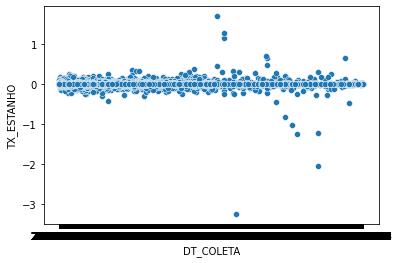

In [4]:
#sns.scatterplot('DT_COLETA','TX_FERRO', hue='TARGET',  data=filtro_loco)
sns.scatterplot('DT_COLETA','TX_ESTANHO',  data=analise_orig1_1)

In [ ]:
analise_orig1.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv', index = None, header=True)

In [ ]:
analise_sort.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv', index = None, header=True)

In [ ]:
analise_orig1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv",sep = ',',encoding = 'utf8')

In [ ]:
analise_sort = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# TAXA DE CRESCIMENTO
#                 NORMAL     BAIXA   MEDIA   CRITICA
#'ALUMINIO'       <15         >15      >30    >45    
#'FERRO'          <12         >12      >30    >45     
#'CROMO'          <15         >15      >30    >45 
#'CHUMBO'         <10         >10      >20    >30 
#'COBRE'          <15         >15      >30    >45  
#'ESTANHO'        <15         >15      >30    >45 
#'PRATA'          <5          >5       >10    >15  
#'SILICIO'        <10         >10             >15
#'SODIO'          <15         >15      >30    >45  

# LIMITE          ACEITÁVEL 
#'TBN'               >4
#'VISCOSIDADE'       >12.6 e <18.4
#'AGUA'              <0.1
#'FULIGEM'           <1.0
#'OXIDACAO'          <5.0
#'SULFATACAO'        <5.0

# Pesos: NORMAL:1  BAIXA:2  MEDIA:3  CRITICA:4

In [5]:
#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']

#'TX_FERRO','TX_CHUMBO','TX_PRATA'
         
        
results = []

for x in range(len(analise_orig1_1)):
  results = []
  for k in range (len(colunas_TX_COMUNS)):
    if analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.15:
      results.append(1)
    if 0.15 <= analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.30:
      results.append(2)
    if 0.30<= analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.45:
      results.append(3)
    if analise_orig1_1[colunas_TX_COMUNS[k]][x] >=0.45:
      results.append(4) 
    #print('results 1',results)     
     
  if analise_orig1_1['TX_FERRO'][x] < 0.12:
    results.append(1)
  if 0.12 <= analise_orig1_1['TX_FERRO'][x] < 0.30:
    results.append(2)
  if 0.30<= analise_orig1_1['TX_FERRO'][x] < 0.45:
    results.append(3)
  if analise_orig1_1['TX_FERRO'][x] >= 0.45:
    results.append(4)  
  #print('results 2',results)
  if analise_orig1_1['TX_CHUMBO'][x] < 0.10:
    results.append(1)
  if 0.10 <= analise_orig1_1['TX_CHUMBO'][x] < 0.20:
    results.append(2)
  if 0.20<= analise_orig1_1['TX_CHUMBO'][x] < 0.30:
    results.append(3)
  if analise_orig1_1['TX_CHUMBO'][x] >= 0.30:
    results.append(4) 
  #print('results 3',results)
  if analise_orig1_1['TX_PRATA'][x] < 0.05:
    results.append(1)
  if 0.05 <= analise_orig1_1['TX_PRATA'][x] < 0.10:
    results.append(2)
  if 0.10<= analise_orig1_1['TX_PRATA'][x] < 0.15:
    results.append(3)
  if analise_orig1_1['TX_PRATA'][x] >= 0.15:
    results.append(4)  
  #print('results 4',results)
  if analise_orig1_1['TX_SILICIO'][x] < 0.10:
    results.append(1)
  if 0.10 <= analise_orig1_1['TX_SILICIO'][x] < 0.15:
    results.append(2)
  if analise_orig1_1['TX_SILICIO'][x] >= 0.15 :
    results.append(4)
  #print('results 5',results)   

  if analise_orig1_1['LIM_TBN'][x] < 4:
    results.append(4) 
  else:
    results.append(1)
  if analise_orig1_1['LIM_VISCOSIDADE'][x] < 12.6:
    results.append(4)
  else:
    results.append(1)  
  if analise_orig1_1['LIM_AGUA'][x] > 0.1:
    results.append(4)
  else:
    results.append(1)  
  if analise_orig1_1['LIM_FULIGEM'][x] > 1:
    results.append(4)
  else:
    results.append(1)  
  if analise_orig1_1['LIM_OXIDACAO'][x] > 5:
    results.append(4)
  else:
    results.append(1)  
  if analise_orig1_1['LIM_SULFATACAO'][x] > 5:
    results.append(4) 
  else:
    results.append(1)  
  #print('results 6',results)  

  score = max(results) 
  if score == 1:
    analise_orig1_1['Target'][x]= 'NORMAL' 
  if score == 2:
    analise_orig1_1['Target'][x]= 'BAIXA'
  if score == 3:
    analise_orig1_1['Target'][x]= 'MEDIA'
  if score == 4:
    analise_orig1_1['Target'][x]= 'CRITICA'                     
  #print('results final',results)
  
  
            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
score

1

In [6]:
analise_orig1_1['Target'].value_counts()

NORMAL     128924
CRITICA     22461
BAIXA       19247
MEDIA        5328
Name: Target, dtype: int64

In [7]:
analise_orig2_1=analise_orig1_1.rename(columns={'Target': 'TARGET'})

In [8]:
analise_orig2_1 = analise_orig2_1[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN','TARGET']]

In [9]:
analise_orig2_1.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,13956,909040,2005-03-23,2.79,134.28,10.87,29.50,194.00,10.64,0.00,4.27,0.37,0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,20.017046,0.000425,0.333459,0.193007,0.284787,7.168057,NORMAL
1,2000292946,907352,2020-12-08,0.00,3.00,0.00,0.00,0.00,0.00,0.00,2.00,7.00,0,14.590000,0.001366,9.827000,0.150000,0.090000,0.140000,-0.021263,-0.011053,-0.001684,-0.008211,-0.003684,-0.003684,0.000000,-0.008947,0.042211,0,14.590000,0.001366,0.150000,0.090000,0.140000,9.827000,NORMAL
2,R-97349,907352,2020-11-03,2.09,3.08,0.09,0.48,0.24,0.42,0.05,2.55,1.87,0,14.730000,0.000425,7.168057,0.200000,0.034300,0.284787,0.002258,0.003871,0.000323,0.002796,-0.000538,0.000968,-0.000215,-0.000323,0.000108,0,14.730000,0.000425,0.200000,0.034300,0.284787,7.168057,NORMAL
3,2000296116,907352,2020-10-15,1.00,8.00,0.00,1.00,0.00,0.00,0.00,5.00,6.00,0,15.060000,0.001474,9.745000,0.090000,0.130000,0.180000,-0.015128,0.008718,-0.007265,-0.008376,-0.009316,-0.012906,-0.004103,0.004701,0.026496,0,15.060000,0.001474,0.090000,0.130000,0.180000,9.745000,NORMAL
4,2000286917,907352,2020-09-18,4.00,5.00,0.00,0.00,1.00,0.00,0.00,3.00,5.00,0,14.890000,0.001158,9.814000,0.300000,0.100000,0.160000,0.009487,-0.007350,-0.007350,-0.012393,-0.000342,-0.011880,-0.005214,-0.012991,0.016496,0,14.890000,0.001158,0.300000,0.100000,0.160000,9.814000,NORMAL


In [10]:
analise_orig2_1.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig2_1.csv', index = None, header=True)

In [11]:
analise_orig2_1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig2_1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
analise_tx = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx.xlsx")

In [ ]:
analise_sort.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_sort.xlsx',index=False)

In [ ]:
analise_tx.to_csv (r'/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx.csv', index = None, header=True)

In [ ]:
analise_tx = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
analise_orig2_1.shape

(175960, 36)

## **Relatório analise_tx**

In [ ]:
perfil_analise_tx = ProfileReport(analise_tx,title  ='Relatório Perfil Planilha Análise de Óleo analise_tx', explorative = True,)
perfil_analise_tx

Summarize dataset:   0%|          | 0/49 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
analise_tx.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,187153,900952,2017-05-25,2.29,17.35,1.21,2.76,4.30,0.0,0.08,5.15,3.81,0,15.94,0.000000,6.890000,0.29,0.20,0.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15.94,0.000000,0.29,0.20,0.26,6.890000,NORMAL
1,189287,900952,2017-07-29,1.72,17.38,1.02,0.68,4.77,0.0,0.00,4.69,3.73,0,16.04,0.000000,6.158954,0.24,0.21,0.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.04,0.000000,0.24,0.21,0.26,6.158954,NORMAL
2,193103,900952,2017-09-29,1.87,18.93,1.44,0.71,5.25,0.0,0.02,5.72,4.16,0,16.20,0.000000,6.158954,0.30,0.23,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.20,0.000000,0.30,0.23,0.28,6.158954,NORMAL
3,193717,900952,2017-11-20,2.60,18.20,1.90,2.90,5.50,0.0,0.10,5.70,5.10,0,16.00,0.000000,6.158954,0.21,0.19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.00,0.000000,0.21,0.19,0.25,6.158954,NORMAL
4,2000290046,900952,2020-10-15,1.00,8.00,7.00,1.00,2.00,0.0,0.00,4.00,6.00,0,15.17,0.002512,10.005000,0.11,0.08,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15.17,0.002512,0.11,0.08,0.15,10.005000,NORMAL


In [ ]:
aa = 903008
filtro_loco = analise_orig2[analise_orig2['LOCO_analise']==903008]
#filtro_loco = filtro_loco[filtro_loco['TARGET']!='TX_ESTANHO']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


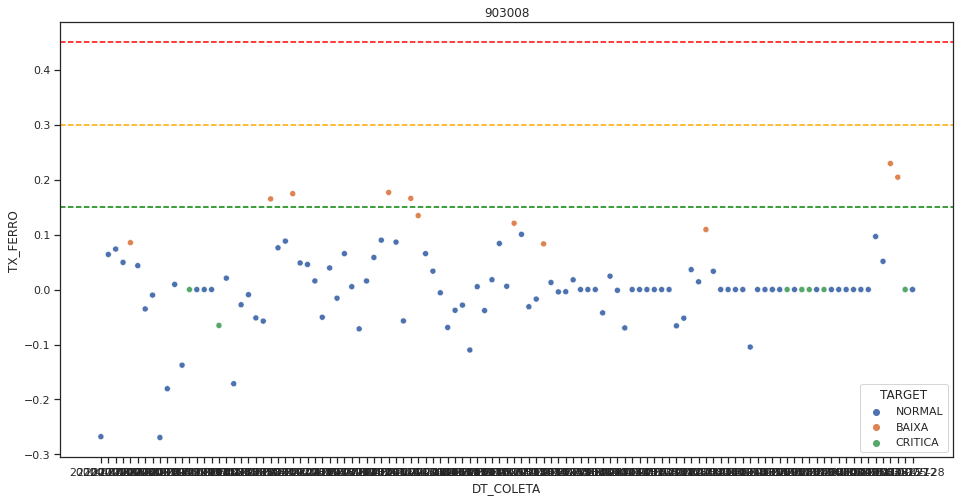

In [ ]:
plt.figure(figsize = (16,8))
plt.title(aa)

sns.set(style="ticks", color_codes=True,font_scale = 1)
g=sns.scatterplot('DT_COLETA','TX_FERRO', hue='TARGET',  data=filtro_loco)
#g.axhline(5,linewidth=2, ls="--",color='r')
#g.axhline(linewidth=2, ls="--",color='r')
plt.axhline(y=0.15, color="green", linestyle="--")
plt.axhline(y=0.30, color="orange", linestyle="--")
plt.axhline(y=0.45, color="red", linestyle="--")
plt.show()



In [ ]:
#cols = ['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','NIQUEL','PRATA','SILICIO','SODIO','AGUA','FULIGEM','OXIDACAO','SULFATACAO']

#cols = ['ALUMINIO','FERRO']

#hue= filtro_loco['TARGET'],
#for i, c in enumerate(cols, 1):
sns.set_style('darkgrid')
g=sns.catplot(y = 'FERRO', x = 'Data_coleta',hue='TARGET',size = 7, s = 9,data = filtro_loco,height = 7 ,aspect=3,legend_out=False) 
plt.title("Locomotiva 903861 - VISCOSIDADE > 12,6 (BOM)",fontsize=40)
g.map(plt.axhline, y=12.6, ls='--', c='red')
g.set_xticklabels(fontsize = 15,rotation=45)
g.set_yticklabels(fontsize = 18)
g.set_ylabels(fontsize = 20)
g.set_xlabels(fontsize = 20)
g.ax.legend(loc=2)
plt.setp(g._legend.get_title(), fontsize=30)
plt.setp(g._legend.get_texts(), fontsize=25)


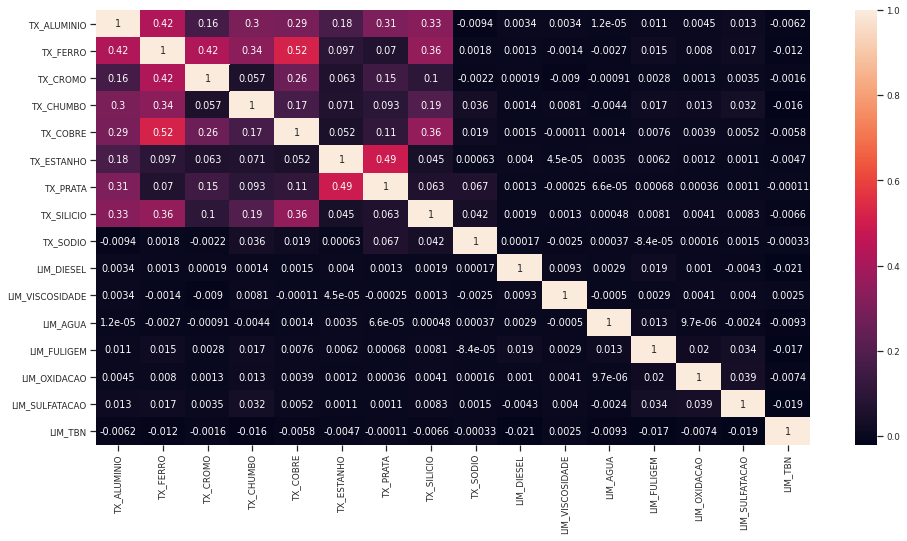

In [ ]:
plt.figure(figsize = (16,8))
sns.set(style="ticks", color_codes=True,font_scale = 0.8)
matriz_correlacao=analise_orig2[['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']].corr()
sns.heatmap(matriz_correlacao,annot=True)
plt.show()

In [ ]:
pip install ppscore

     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=e5ea0f340081aba30591c556a547fe6ba65060596ea8c16813f319836c5fb454
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


## **Tipos e quantidades de variáveis 'Target'**

In [ ]:
analise_orig2['TARGET'].value_counts()

NORMAL     129005
CRITICA     22371
BAIXA       19213
MEDIA        5371
Name: TARGET, dtype: int64

## **Assimetria :**

Se a assimetria é menor que -1 ou maior que 1, a distribuição é altamente distorcida.
Se a assimetria é entre -1 e -0,5 ou entre 0,5 e 1, a distribuição é enviesada moderadamente.
Se a assimetria é entre -0,5 e 0,5, a distribuição é aproximadamente simétrica.


In [13]:
analise_orig2_1.skew()

LOCO_analise         1.577490
ALUMINIO            11.170505
FERRO              110.758929
CROMO               48.288686
CHUMBO               9.621152
COBRE               14.745667
ESTANHO             77.467866
PRATA              204.655004
SILICIO            114.616028
SODIO              227.567447
DIESEL              16.387541
VISCOSIDADE         21.097360
AGUA               141.925951
TBN                320.893929
FULIGEM            126.297054
OXIDACAO           335.636299
SULFATACAO         145.745022
TX_ALUMINIO         -4.374084
TX_FERRO            30.147747
TX_CROMO           302.749777
TX_CHUMBO           -0.731490
TX_COBRE             5.654341
TX_ESTANHO         -56.113121
TX_PRATA          -122.388346
TX_SILICIO        -104.488625
TX_SODIO           259.385196
LIM_DIESEL          16.387541
LIM_VISCOSIDADE     21.097360
LIM_AGUA           141.925951
LIM_FULIGEM        126.297054
LIM_OXIDACAO       335.636299
LIM_SULFATACAO     145.745022
LIM_TBN            320.893929
dtype: flo

# **Normalização Planilha "analise_tx"**

In [15]:

from sklearn.preprocessing import MinMaxScaler
#array = analise_tx.values
array = analise_orig2_1.values
# Separando o array em componentes de input (X) e output (Y)
K = array[:,0:3]
X = array[:,3:35]
Y = array[:,35]

colunas = ['ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

                       
colunas1 = ['NU_ANLS_OLEO','LOCO_analise','DT_COLETA']  
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
#print("Dados Originais: \n\n", analise_orig2.values)
#print("\nDados Normalizados: \n\n", rescaledX[0:5,:])
df = pd.DataFrame(rescaledX,columns=colunas) 
df1 = pd.DataFrame(K,columns=colunas1)
target = pd.DataFrame(Y)
df['TARGET'] = target
#df = pd.DataFrame(rescaledX)
#df1 = pd.DataFrame(Y)
df = pd.concat([df1,df], axis=1)
df.head()
#df1.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,13956,909040,2005-03-23,0.020595,0.036496,0.024915,0.056297,0.184145,0.086126,0.000000,0.001961,0.000003,0.0,0.012495,0.000370,0.004788,0.001588,0.000877,0.002262,0.535687,0.353556,0.088092,0.510221,0.445782,0.658412,0.718482,0.844299,0.210423,0.0,0.012495,0.000370,0.001588,0.000877,0.002262,0.004788,NORMAL
1,2000292946,907352,2020-12-08,0.000000,0.000815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000918,0.000066,0.0,0.009107,0.001188,0.006564,0.000714,0.000409,0.001112,0.532492,0.353418,0.088062,0.509258,0.445659,0.657666,0.718482,0.844173,0.210431,0.0,0.009107,0.001188,0.000714,0.000409,0.001112,0.006564,NORMAL
2,R-97349,907352,2020-11-03,0.015428,0.000837,0.000206,0.000916,0.000228,0.003400,0.000304,0.001171,0.000018,0.0,0.009195,0.000370,0.004788,0.000952,0.000156,0.002262,0.536027,0.353604,0.088098,0.510549,0.445764,0.658608,0.718446,0.844294,0.210423,0.0,0.009195,0.000370,0.000952,0.000156,0.002262,0.004788,NORMAL
3,2000296116,907352,2020-10-15,0.007382,0.002174,0.000000,0.001908,0.000000,0.000000,0.000000,0.002296,0.000056,0.0,0.009401,0.001282,0.006510,0.000429,0.000591,0.001430,0.533414,0.353664,0.087962,0.509239,0.445472,0.655798,0.717801,0.844365,0.210428,0.0,0.009401,0.001282,0.000429,0.000591,0.001430,0.006510,NORMAL
4,2000286917,907352,2020-09-18,0.029527,0.001359,0.000000,0.000000,0.000949,0.000000,0.000000,0.001378,0.000047,0.0,0.009295,0.001007,0.006556,0.001429,0.000455,0.001271,0.537113,0.353464,0.087960,0.508768,0.445770,0.656006,0.717616,0.844117,0.210426,0.0,0.009295,0.001007,0.001429,0.000455,0.001271,0.006556,NORMAL


In [16]:
df.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig_pdr_1.xlsx',index=False)
df.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig_pdr_1.csv',index=False)

In [17]:
analise_orig_pdr_1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig_pdr_1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
analise_orig_pdr_1.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,13956,909040,2005-03-23,0.020595,0.036496,0.024915,0.056297,0.184145,0.086126,0.000000,0.001961,0.000003,0.0,0.012495,0.000370,0.004788,0.001588,0.000877,0.002262,0.535687,0.353556,0.088092,0.510221,0.445782,0.658412,0.718482,0.844299,0.210423,0.0,0.012495,0.000370,0.001588,0.000877,0.002262,0.004788,NORMAL
1,2000292946,907352,2020-12-08,0.000000,0.000815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000918,0.000066,0.0,0.009107,0.001188,0.006564,0.000714,0.000409,0.001112,0.532492,0.353418,0.088062,0.509258,0.445659,0.657666,0.718482,0.844173,0.210431,0.0,0.009107,0.001188,0.000714,0.000409,0.001112,0.006564,NORMAL
2,R-97349,907352,2020-11-03,0.015428,0.000837,0.000206,0.000916,0.000228,0.003400,0.000304,0.001171,0.000018,0.0,0.009195,0.000370,0.004788,0.000952,0.000156,0.002262,0.536027,0.353604,0.088098,0.510549,0.445764,0.658608,0.718446,0.844294,0.210423,0.0,0.009195,0.000370,0.000952,0.000156,0.002262,0.004788,NORMAL
3,2000296116,907352,2020-10-15,0.007382,0.002174,0.000000,0.001908,0.000000,0.000000,0.000000,0.002296,0.000056,0.0,0.009401,0.001282,0.006510,0.000429,0.000591,0.001430,0.533414,0.353664,0.087962,0.509239,0.445472,0.655798,0.717801,0.844365,0.210428,0.0,0.009401,0.001282,0.000429,0.000591,0.001430,0.006510,NORMAL
4,2000286917,907352,2020-09-18,0.029527,0.001359,0.000000,0.000000,0.000949,0.000000,0.000000,0.001378,0.000047,0.0,0.009295,0.001007,0.006556,0.001429,0.000455,0.001271,0.537113,0.353464,0.087960,0.508768,0.445770,0.656006,0.717616,0.844117,0.210426,0.0,0.009295,0.001007,0.001429,0.000455,0.001271,0.006556,NORMAL


# **Padronização e Normalização - Planilha "analise_tx_pdr"**

In [19]:
from sklearn.preprocessing import StandardScaler

array = analise_orig_pdr_1.values
# Separando o array em componentes de input (X) e output (Y)
K = array[:,0:3]
X = array[:,3:35]
Y = array[:,35]


scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

df = pd.DataFrame(standardX,columns=colunas) 
df1 = pd.DataFrame(K,columns=colunas1)
target = pd.DataFrame(Y)
df['TARGET'] = target
df = pd.concat([df1,df], axis=1)
#df = pd.DataFrame(rescaledX)
#df1 = pd.DataFrame(Y)
df.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,13956,909040,2005-03-23,-0.024079,7.380059,3.668274,4.874679,22.178045,14.962162,-0.119226,-0.438204,-0.069214,-0.060797,-0.000003,0.000003,-6.686781e-07,0.000002,-5.556381e-07,-0.000001,0.004442,-0.003042,-0.002685,-0.004863,0.012423,-0.004585,0.000582,0.007770,-0.002810,-0.060797,-0.000003,0.000003,0.000002,-5.556381e-07,-0.000001,-6.686781e-07,NORMAL
1,2000292946,907352,2020-12-08,-1.813418,-0.697262,-0.428777,-0.882518,-0.596417,-0.148196,-0.119226,-0.717837,-0.050458,-0.060797,-0.347268,0.157098,6.844095e-01,-0.178835,-1.797940e-01,-0.282036,-0.518172,-0.035683,-0.015074,-0.077560,-0.008759,-0.237216,0.000582,-0.030234,0.000013,-0.060797,-0.347268,0.157098,-0.178835,-1.797940e-01,-0.282036,6.844095e-01,NORMAL
2,R-97349,907352,2020-11-03,-0.473017,-0.692340,-0.394855,-0.788841,-0.568242,0.448265,-0.039953,-0.650084,-0.064971,-0.060797,-0.338309,0.000003,-6.686781e-07,-0.130094,-2.770154e-01,-0.000001,0.059941,0.008390,-0.000312,0.019891,0.009332,0.056520,-0.012450,0.006400,-0.002803,-0.060797,-0.338309,0.000003,-0.130094,-2.770154e-01,-0.000001,-6.686781e-07,NORMAL
3,2000296116,907352,2020-10-15,-1.172078,-0.389625,-0.428777,-0.687359,-0.596417,-0.148196,-0.119226,-0.348278,-0.053287,-0.060797,-0.317193,0.175136,6.633028e-01,-0.237323,-1.099762e-01,-0.204119,-0.367385,0.022705,-0.056127,-0.079026,-0.041139,-0.819501,-0.248041,0.027738,-0.001038,-0.060797,-0.317193,0.175136,-0.237323,-1.099762e-01,-0.204119,6.633028e-01,NORMAL
4,2000286917,907352,2020-09-18,0.751942,-0.574207,-0.428777,-0.882518,-0.479023,-0.148196,-0.119226,-0.594650,-0.056116,-0.060797,-0.328071,0.122360,6.810633e-01,-0.032614,-1.623396e-01,-0.243077,0.237621,-0.024750,-0.056755,-0.114594,0.010458,-0.754740,-0.315376,-0.047412,-0.001707,-0.060797,-0.328071,0.122360,-0.032614,-1.623396e-01,-0.243077,6.810633e-01,NORMAL


In [20]:
df.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr2_1.xlsx',index=False)
df.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr2_1.csv',index=False)

In [21]:
analise_tx_pdr2_1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr2_1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Power Transformer planilha "analise_tx_pdr2"**

In [23]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

cols = ['ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

pt = PowerTransformer(method = "yeo-johnson",standardize=True)
data_trans = pt.fit_transform(analise_tx_pdr2_1[cols])
data_trans=pd.DataFrame(data_trans) 
data_trans.columns = cols 
#data_trans = data_trans.assign(padronizada['Target']) 
data_trans = data_trans.join(analise_tx_pdr2_1['TARGET'])  
data_trans = pd.concat([df1,data_trans], axis=1)            

In [24]:
data_trans.skew()

LOCO_analise        1.577490
ALUMINIO            0.166591
FERRO               0.051754
CROMO               0.139064
CHUMBO              0.167127
COBRE               0.543196
ESTANHO             3.203893
PRATA               0.458489
SILICIO            -0.032270
SODIO               1.111814
DIESEL             16.387541
VISCOSIDADE        -0.696647
AGUA                1.083812
TBN                -0.182100
FULIGEM            -0.005505
OXIDACAO           -0.167875
SULFATACAO         -0.213411
TX_ALUMINIO         0.092604
TX_FERRO            4.462513
TX_CROMO            5.708299
TX_CHUMBO           0.284936
TX_COBRE            2.243241
TX_ESTANHO         -2.658885
TX_PRATA           -4.928555
TX_SILICIO         -8.951263
TX_SODIO          -64.350340
LIM_DIESEL         16.387541
LIM_VISCOSIDADE    -0.696647
LIM_AGUA            1.083812
LIM_FULIGEM        -0.005505
LIM_OXIDACAO       -0.167875
LIM_SULFATACAO     -0.213411
LIM_TBN            -0.182100
dtype: float64

In [25]:
data_trans['TARGET'].value_counts()


NORMAL     128924
CRITICA     22461
BAIXA       19247
MEDIA        5328
Name: TARGET, dtype: int64

In [ ]:
analise_tx_pdr3.insert(0,"Locomotiva",analise_tx['LOCO_analise'],True)

In [ ]:
analise_tx_pdr3.insert(0,"DT_COLETA",analise_tx['DT_COLETA'],True)

In [ ]:
analise_tx_pdr3.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,13956,909040,2005-03-23,0.099137,3.185829,2.399436,2.306443,2.095843,3.581275,-1.037926,-0.963997,-1.205889,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,-0.005987,0.002207,0.012396,-0.011976,0.015193,-0.011459,-0.006592,-0.001284,0.000665,-0.060797,0.827206,1.011723,0.264321,0.141778,0.141181,0.108560,NORMAL
1,2000292946,907352,2020-12-08,-2.526123,-2.057596,-1.585440,-1.859548,-1.702728,-0.288102,-1.037926,-2.198755,-0.316922,-0.060797,-0.924824,1.874883,1.606313,-0.831715,-1.820821,-1.485238,-0.520636,-0.031211,-0.010256,-0.084438,-0.005985,-0.244569,-0.006592,-0.050236,0.004019,-0.060797,-0.924824,1.874883,-0.831715,-1.820821,-1.485238,1.606313,NORMAL
2,R-97349,907352,2020-11-03,-0.457001,-2.033834,-1.339614,-1.510785,-1.508023,3.571296,0.266159,-1.869161,-0.982523,-0.060797,-0.860474,1.011723,0.108560,-0.493211,-3.157567,0.141181,0.049304,0.013901,0.016726,0.012731,0.012103,0.050268,-0.020807,-0.003051,0.000674,-0.060797,-0.860474,1.011723,-0.493211,-3.157567,0.141181,0.108560,NORMAL
3,2000296116,907352,2020-10-15,-1.468937,-0.766095,-1.585440,-1.162060,-1.702728,-0.288102,-1.037926,-0.635067,-0.435590,-0.060797,-0.713418,1.901120,1.567189,-1.280694,-0.983736,-0.988643,-0.373132,0.028537,-0.085814,-0.085898,-0.038375,-0.817682,-0.274444,0.024486,0.002770,-0.060797,-0.713418,1.901120,-1.280694,-0.983736,-0.988643,1.567189,NORMAL
4,2000286917,907352,2020-09-18,0.878329,-1.494365,-1.585440,-1.859548,-0.949534,-0.288102,-1.037926,-1.614203,-0.559402,-0.060797,-0.788370,1.803927,1.600133,0.093297,-1.602212,-1.232376,0.227177,-0.020013,-0.086977,-0.121298,0.013229,-0.754549,-0.345889,-0.072321,0.001976,-0.060797,-0.788370,1.803927,0.093297,-1.602212,-1.232376,1.600133,NORMAL


In [26]:
data_trans.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3_1.xlsx',index=False)
data_trans.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3_1.csv',index=False)

In [27]:
analise_tx_pdr3_1 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3_1.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
analise_tx_pdr3_1.isnull().sum()

NU_ANLS_OLEO       0
LOCO_analise       0
DT_COLETA          0
ALUMINIO           0
FERRO              0
CROMO              0
CHUMBO             0
COBRE              0
ESTANHO            0
PRATA              0
SILICIO            0
SODIO              0
DIESEL             0
VISCOSIDADE        0
AGUA               0
TBN                0
FULIGEM            0
OXIDACAO           0
SULFATACAO         0
TX_ALUMINIO        0
TX_FERRO           0
TX_CROMO           0
TX_CHUMBO          0
TX_COBRE           0
TX_ESTANHO         0
TX_PRATA           0
TX_SILICIO         0
TX_SODIO           0
LIM_DIESEL         0
LIM_VISCOSIDADE    0
LIM_AGUA           0
LIM_FULIGEM        0
LIM_OXIDACAO       0
LIM_SULFATACAO     0
LIM_TBN            0
TARGET             0
dtype: int64

In [29]:
analise_tx_pdr3_1['TARGET'].value_counts()

NORMAL     128924
CRITICA     22461
BAIXA       19247
MEDIA        5328
Name: TARGET, dtype: int64

In [ ]:
#data_trans=data_trans.Target.astype("category")
analise_tx_pdr3['TARGET'] = analise_tx_pdr3.TARGET.astype('category')
analise_tx_pdr3.dtypes

DT_COLETA            object
Locomotiva            int64
ALUMINIO            float64
FERRO               float64
CROMO               float64
CHUMBO              float64
COBRE               float64
ESTANHO             float64
PRATA               float64
SILICIO             float64
SODIO               float64
DIESEL              float64
VISCOSIDADE         float64
AGUA                float64
TBN                 float64
FULIGEM             float64
OXIDACAO            float64
SULFATACAO          float64
TX_ALUMINIO         float64
TX_FERRO            float64
TX_CROMO            float64
TX_CHUMBO           float64
TX_COBRE            float64
TX_ESTANHO          float64
TX_PRATA            float64
TX_SILICIO          float64
TX_SODIO            float64
LIM_DIESEL          float64
LIM_VISCOSIDADE     float64
LIM_AGUA            float64
LIM_FULIGEM         float64
LIM_OXIDACAO        float64
LIM_SULFATACAO      float64
LIM_TBN             float64
TARGET             category
dtype: object

## **PairPlot scatter com regressão planilha "integrada_trans"**

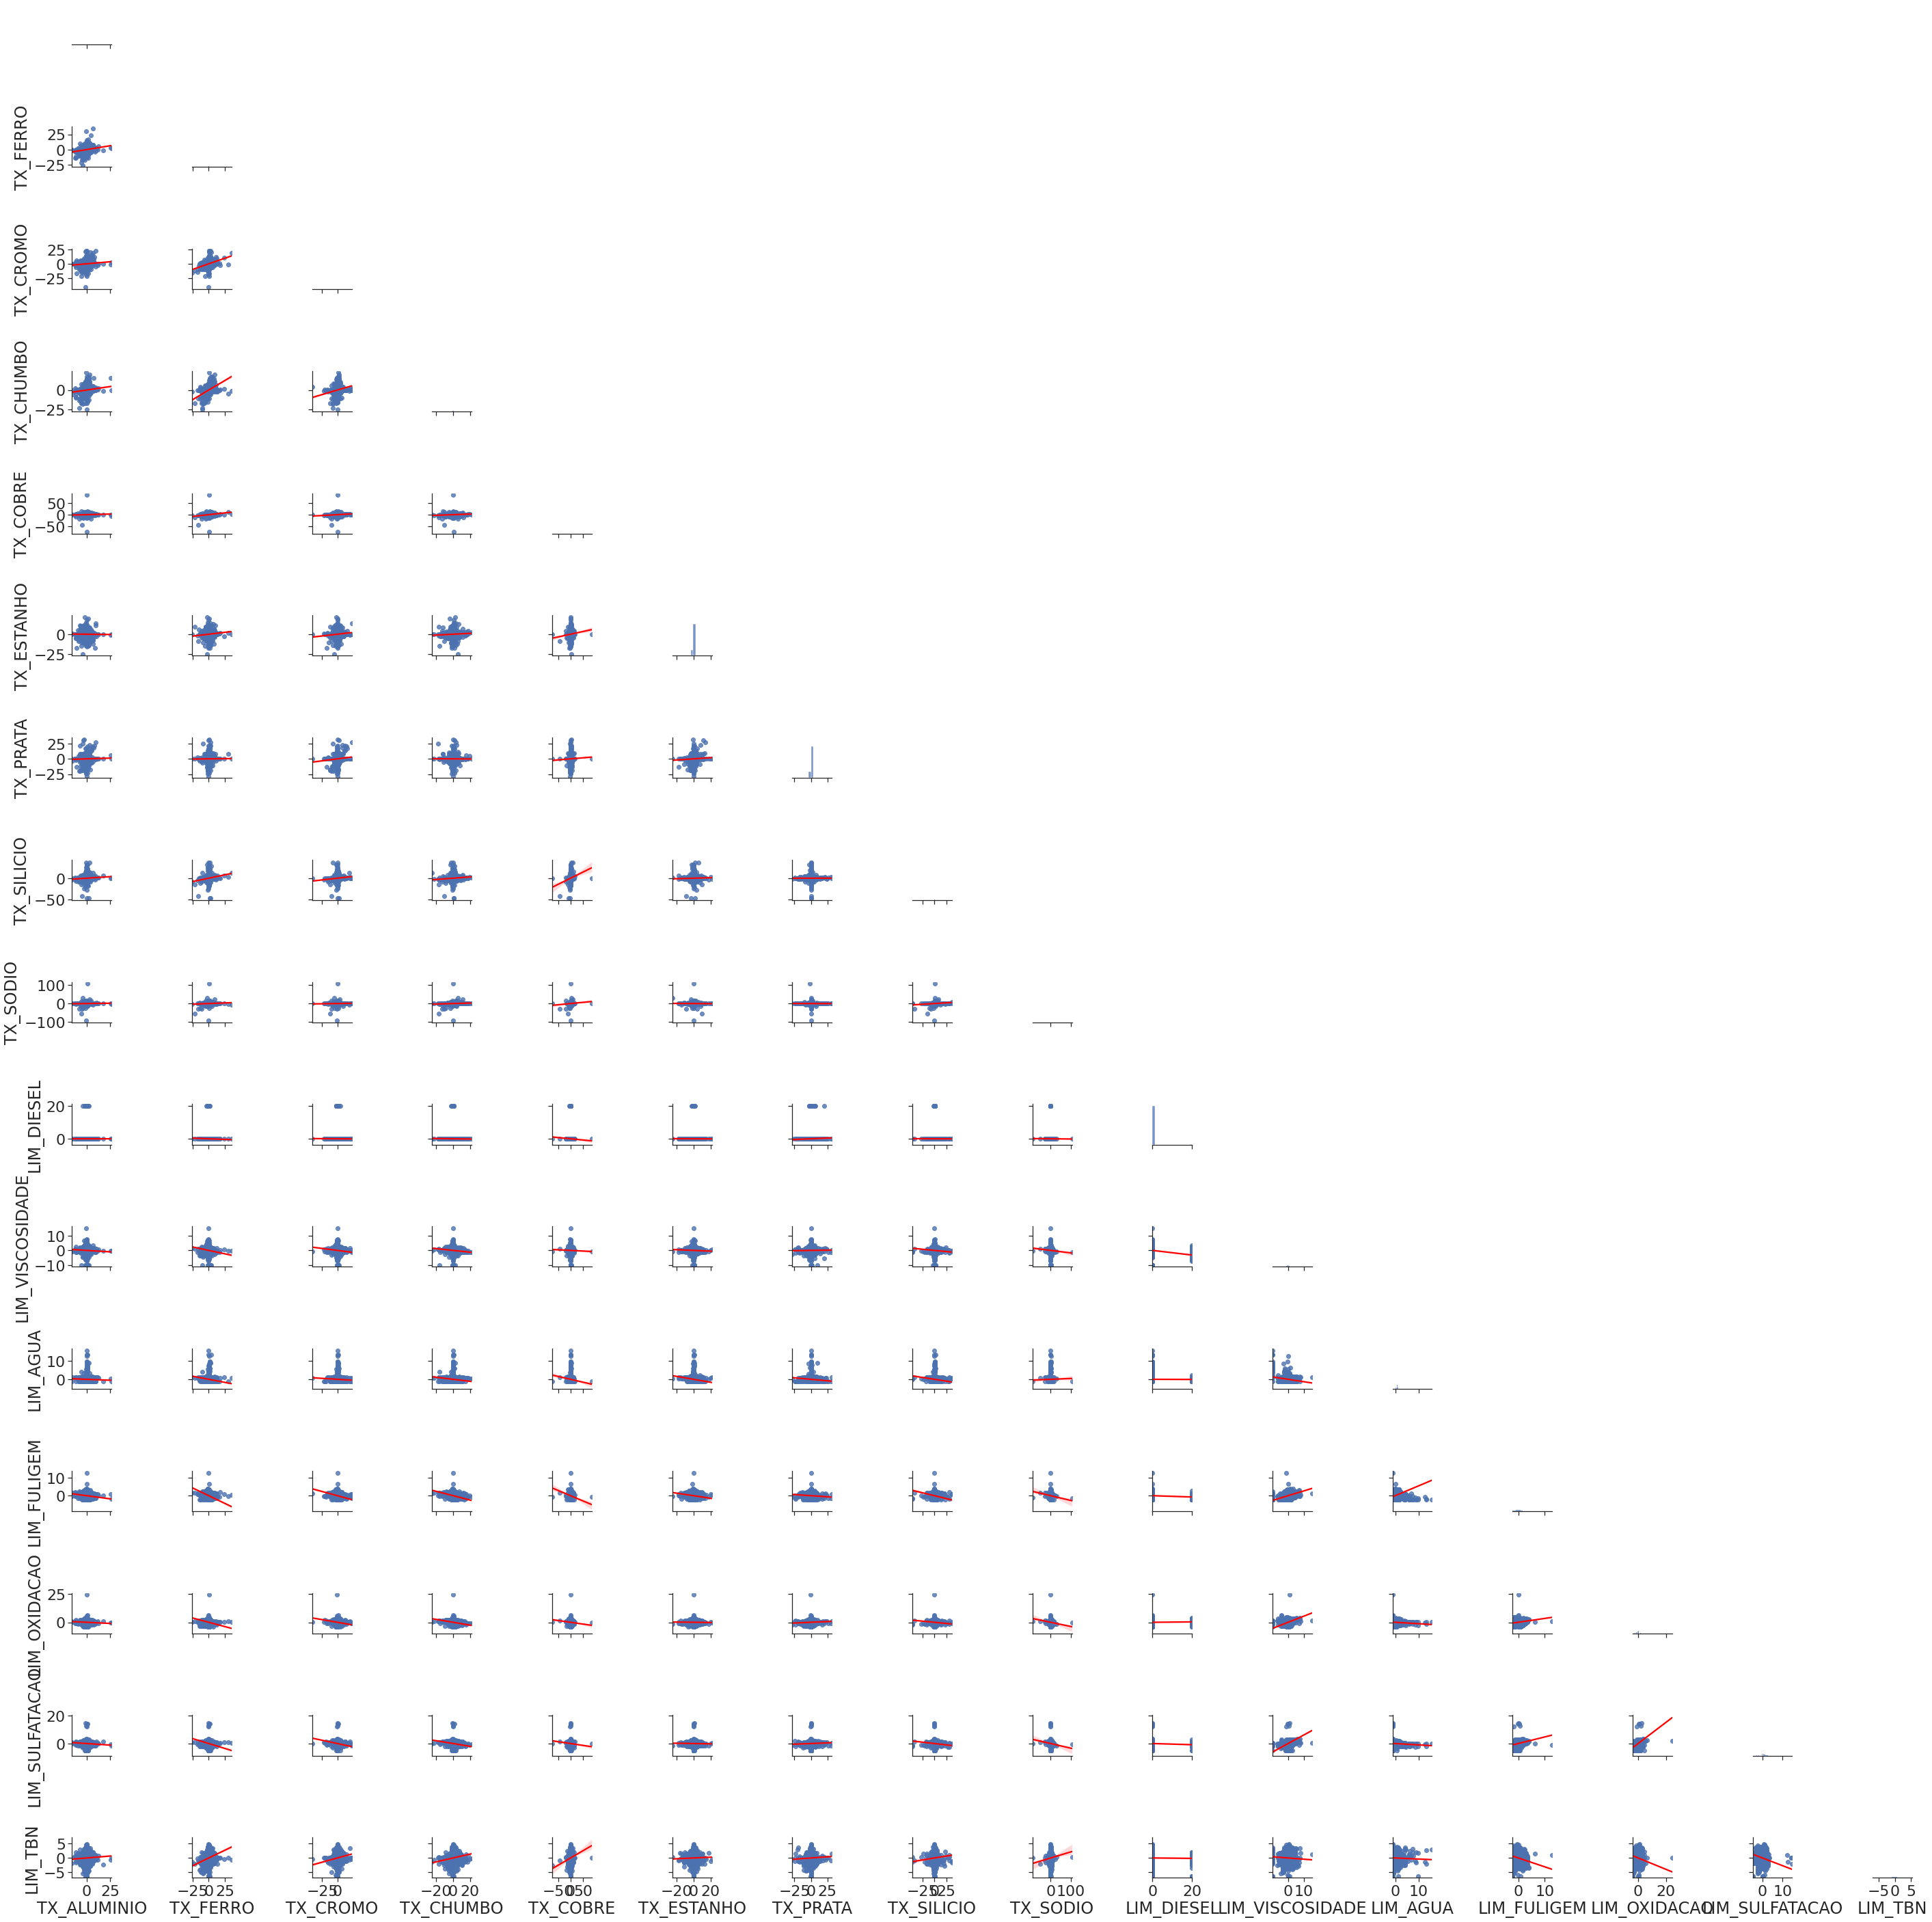

In [ ]:
plt.rcParams["figure.figsize"] = [20,20]
sns.set(style="ticks", color_codes=True,font_scale = 2)

sns.pairplot(df,kind='reg',corner=True, plot_kws={'line_kws':{'color':'red'}})#,hue=data_trans['Target'])

## **Densidade planilha "analise_tx"**

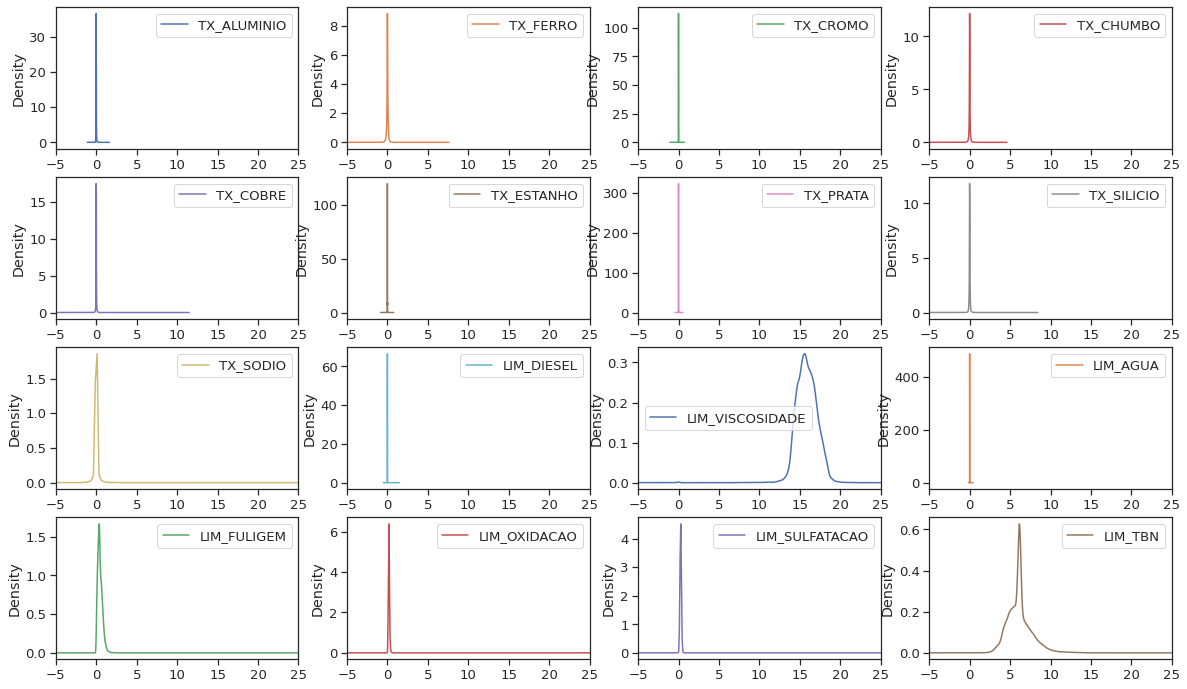

In [ ]:
plt.rcParams["figure.figsize"] = [20,12]
sns.set(style="ticks", color_codes=True,font_scale = 1.2)
df= analise_tx[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN']]
df.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False,xlim=[-5,25])
plt.show()

## **Correlação planilha "analise_tx_pdr3"**

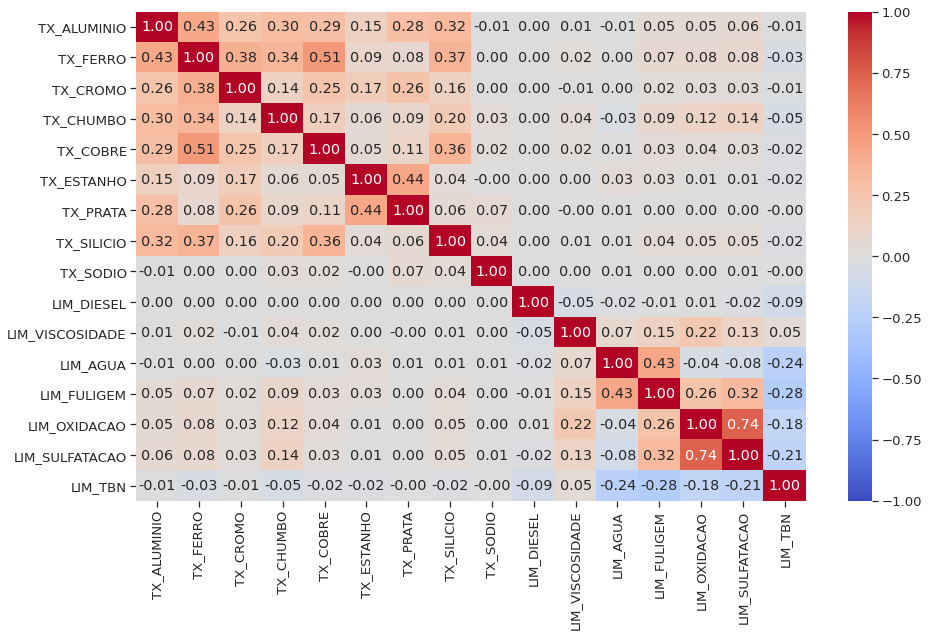

In [ ]:
plt.figure(figsize=(15,9))
sns.set(style="ticks", color_codes=True,font_scale = 1.2)
dfpdr= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN']]
sns.heatmap(dfpdr.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True, fmt = '.2f')

## **BoxPlot variáveis planilha "analise_tx_pdr3"**

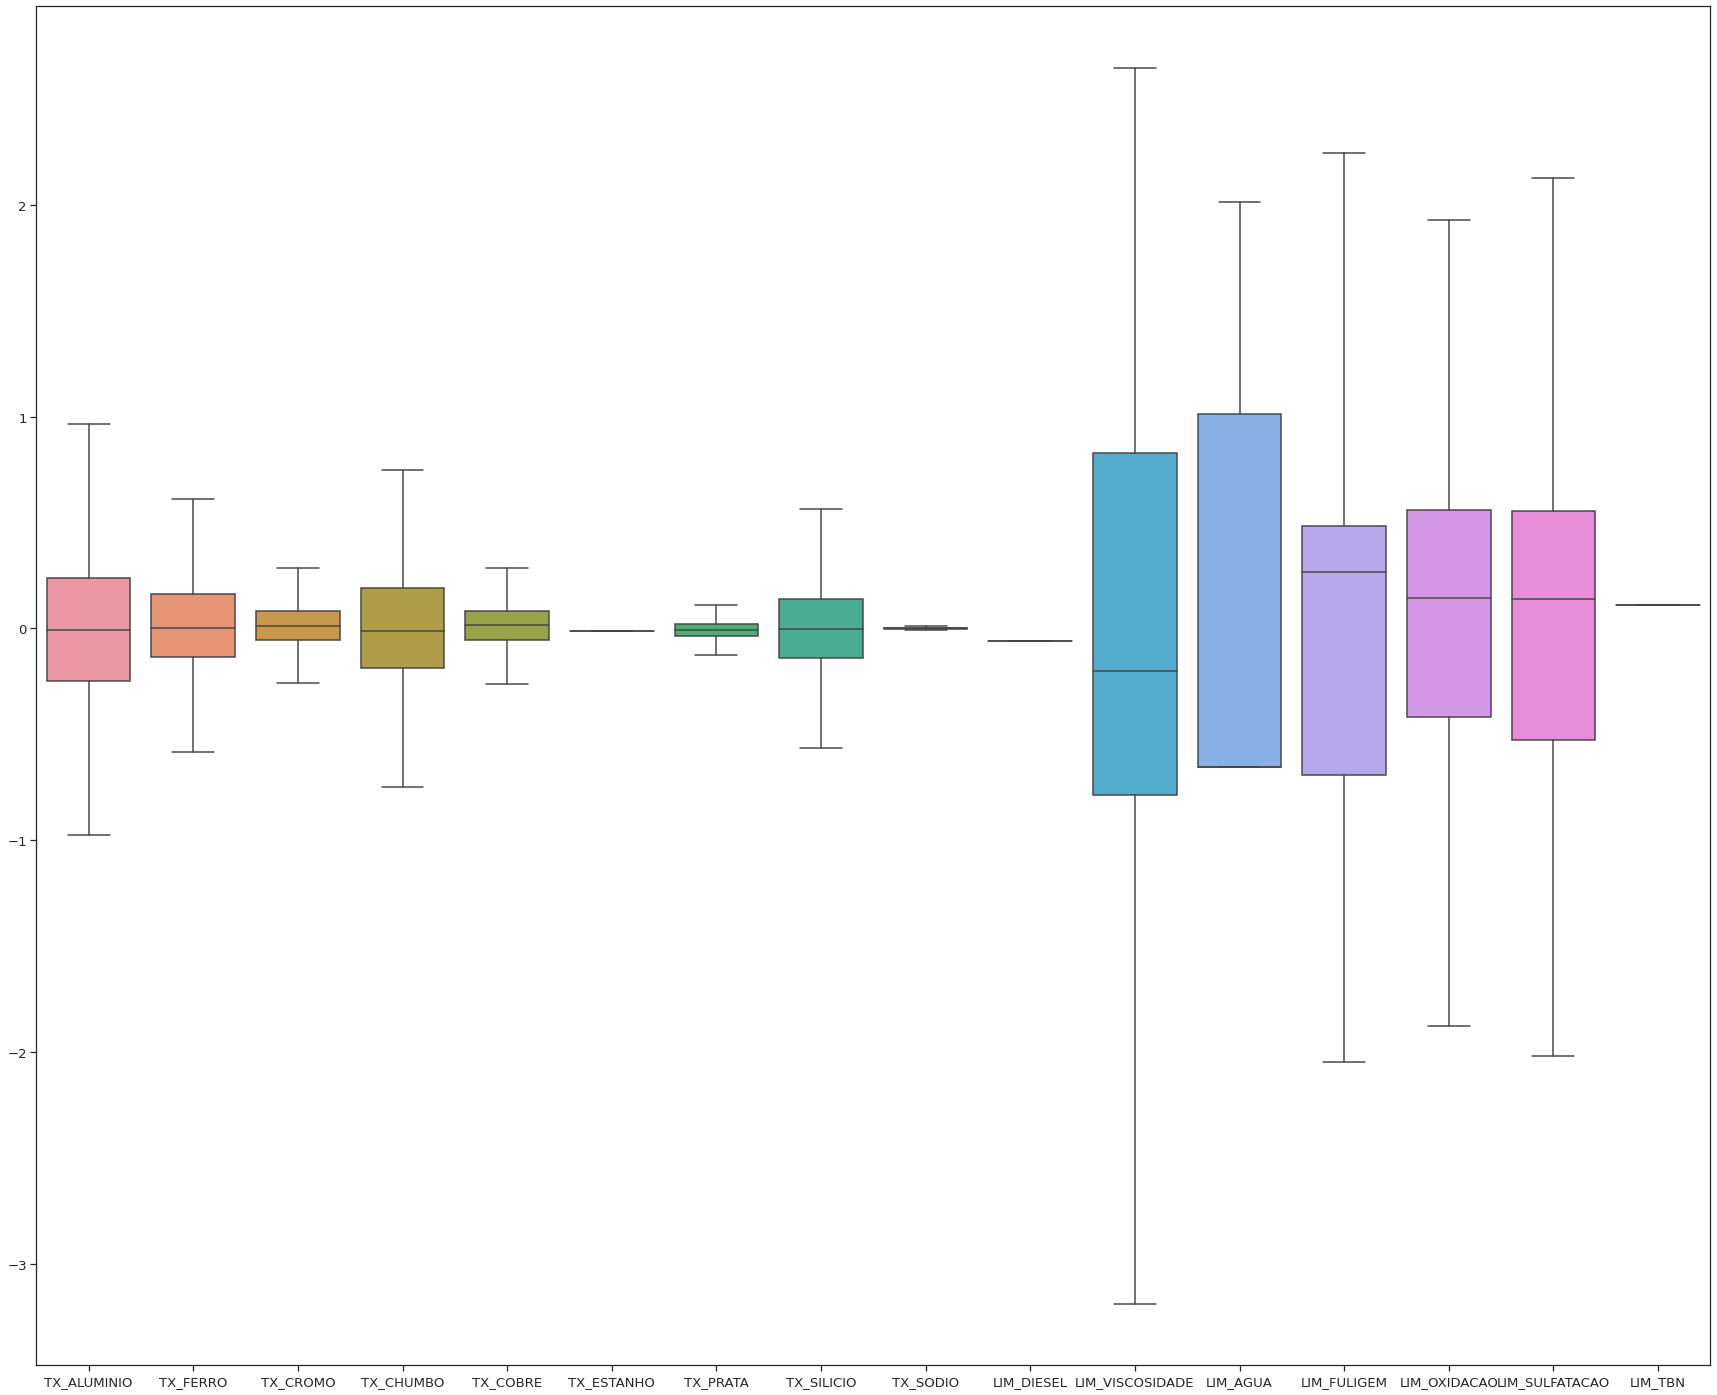

In [ ]:
plt.rcParams["figure.figsize"] = [30,25]
sns.set(style="ticks", color_codes=True,font_scale = 1.2)
sns.boxplot( data = dfpdr, showfliers = False)

In [ ]:
pip install ppscore

     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=d0dfa835422658b995b3584cda3a006d16dc29704dbcbabed3b9eca3cabf2e44
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [ ]:
import ppscore as pps

In [ ]:
dfpdr.dtypes

TX_ALUMINIO        float64
TX_FERRO           float64
TX_CROMO           float64
TX_CHUMBO          float64
TX_COBRE           float64
TX_ESTANHO         float64
TX_PRATA           float64
TX_SILICIO         float64
TX_SODIO           float64
LIM_DIESEL         float64
LIM_VISCOSIDADE    float64
LIM_AGUA           float64
LIM_FULIGEM        float64
LIM_OXIDACAO       float64
LIM_SULFATACAO     float64
LIM_TBN            float64
dtype: object

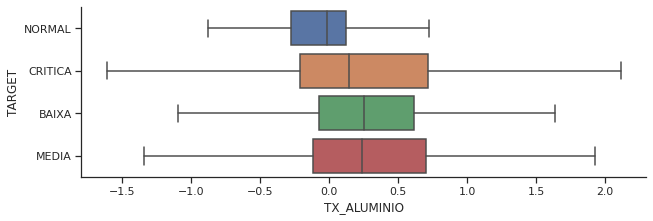

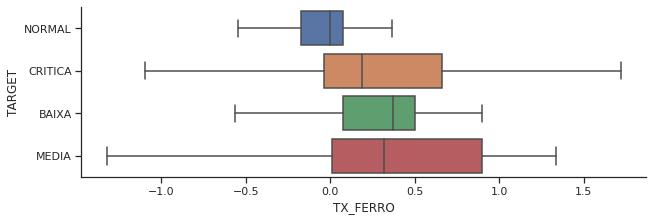

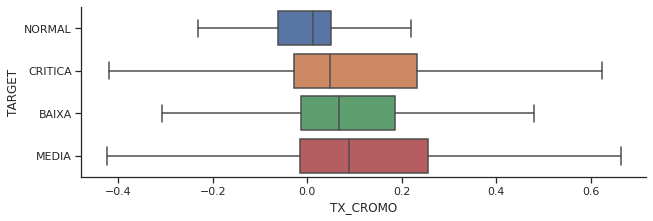

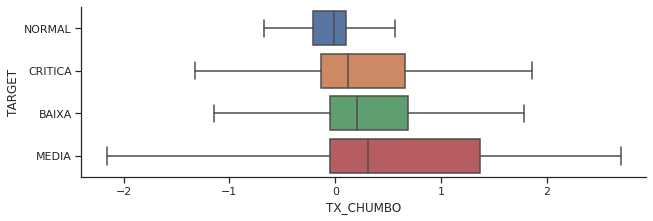

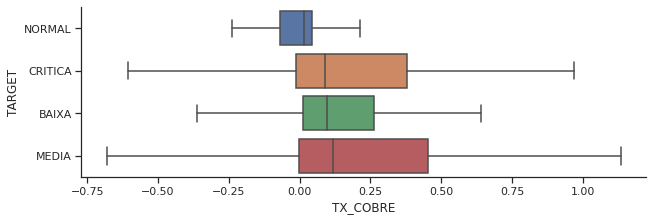

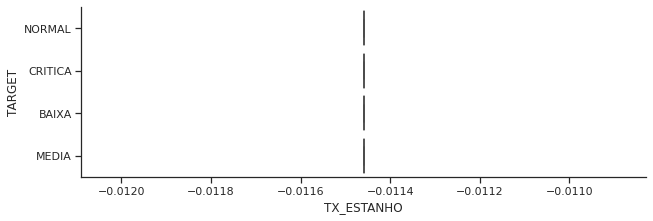

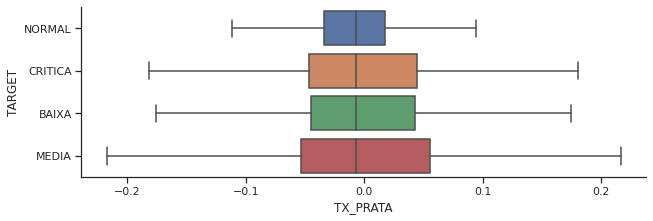

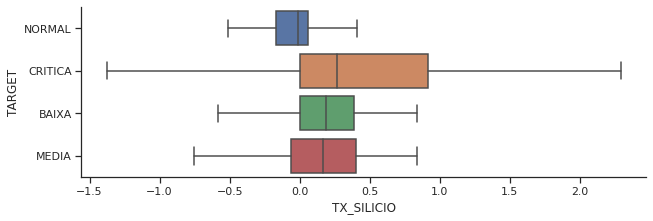

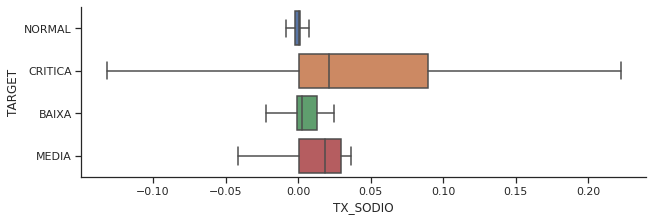

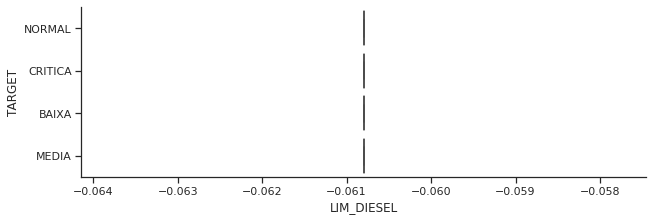

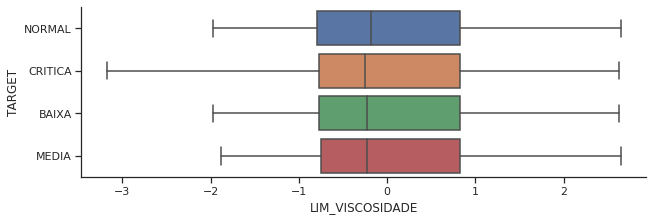

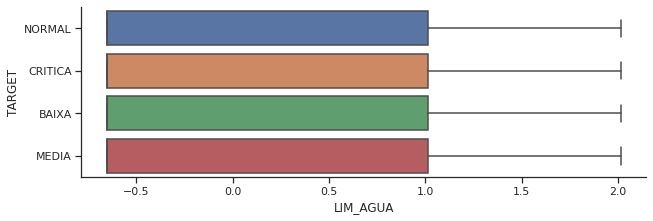

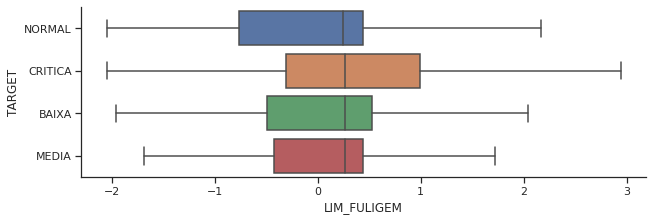

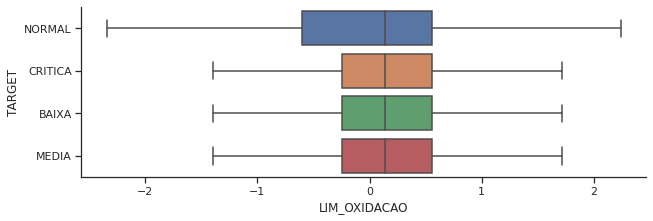

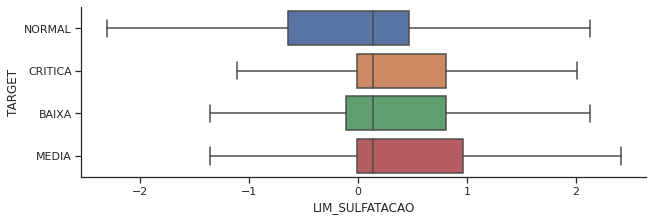

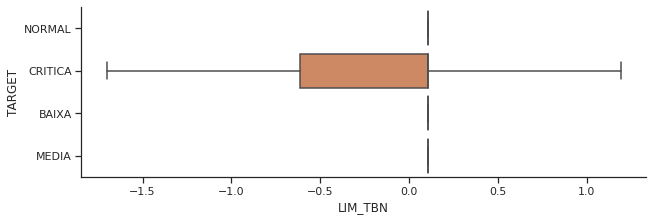

In [ ]:
df2= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN','TARGET']]
cols = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN']
sns.set(style="ticks", color_codes=True,font_scale = 1.0)
for i, c in enumerate(cols, 1):
    sns.catplot(x = df2[c], y = df2['TARGET'], data = df2, kind = "box",showfliers=False,height = 3 ,aspect=3) 

In [ ]:
pip install fastcluster

     |████████████████████████████████| 163kB 9.9MB/s 


## **ClusterMap Planilha "integrada_tx"**

<Figure size 2160x1800 with 0 Axes>

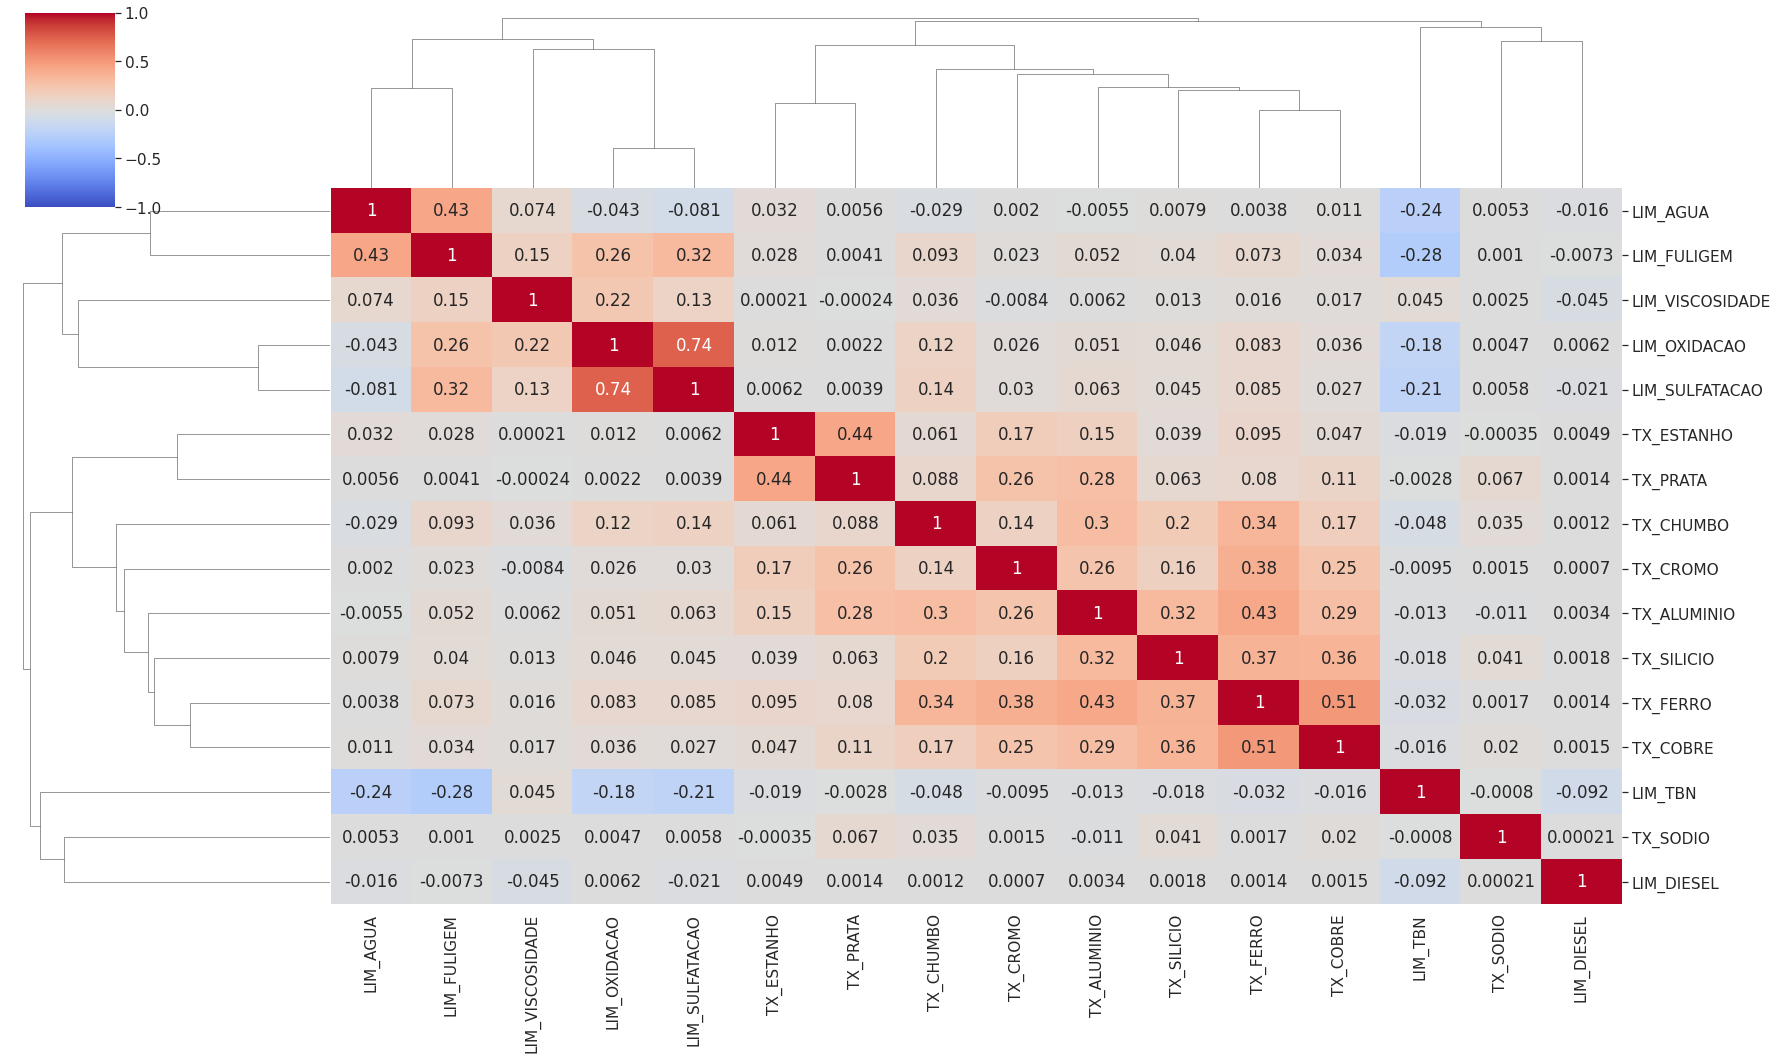

In [ ]:
#df= integrada_trans
#del df['TARGET']
sns.set(font_scale=1.4)
plt.figure(figsize=(30,25))
sns.clustermap(df2.corr(),vmin=-1, vmax=+1,figsize=(25,15),annot=True,cmap='coolwarm')

## **JointPlot Planilha "integrada_trans"**

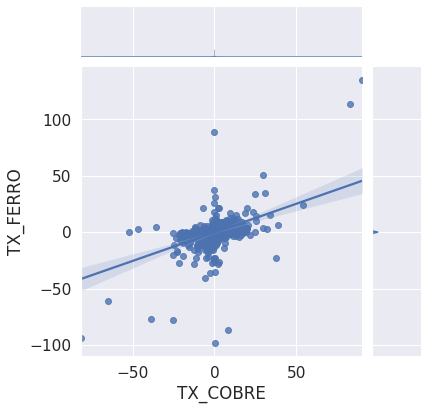

In [ ]:
sns.jointplot(x = "TX_COBRE", y = "TX_FERRO", 
              kind = "reg", data = analise_tx_pdr3, 
              dropna = True) 
  
# show the plot 
plt.show() 

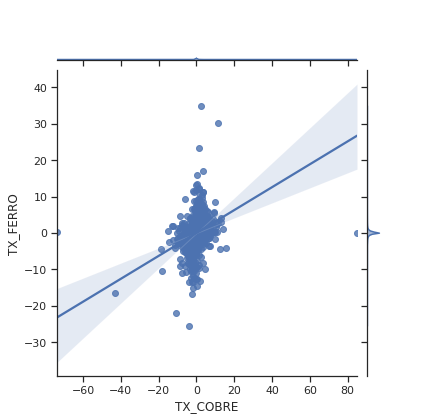

In [ ]:
sns.jointplot(x = "TX_COBRE", y = "TX_FERRO", 
              kind = "reg", data = analise_tx_pdr3, 
              dropna = True) 
  
# show the plot 
plt.show() 

# **Fazendo encoder da coluna "Target" Planilha "padronizada_enc"**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# criando instância de labelencoder 
labelencoder = LabelEncoder ()
# Atribuição de valores numéricos e armazenamento em outra coluna 
analise_tx_pdr3 ['TARGET'] = labelencoder.fit_transform (analise_tx_pdr3 ['TARGET']) 
analise_tx_pdr3.tail()

,DT_COLETA,Locomotiva,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
40335,2020-09-04,907352,0.164288,-1.909560,-1.156444,-1.205164,-1.725644,0.952798,-0.618828,-1.948623,-0.574595,-0.049851,-0.800199,0.177763,0.121874,-1.557927,-2.869232,0.154609,-0.687491,-0.131577,-0.142061,-0.093285,-0.058725,-0.232237,0.012941,-0.109615,0.073704,-0.049851,-0.800199,0.177763,-1.557927,-2.869232,0.154609,0.121874,1
40336,2020-09-18,907352,1.244566,-1.672753,-1.564920,-1.534239,-1.086978,-0.584746,-0.618828,-1.871508,-0.147640,-0.049851,-0.771320,0.065125,2.094449,-0.487415,-1.600049,-1.506266,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.000240,-0.049851,-0.771320,0.065125,-0.487415,-1.600049,-1.506266,2.094449,1
40337,2020-10-15,907352,-0.698985,-0.981997,-1.564920,-1.117054,-2.112355,-0.584746,-0.618828,-0.939725,0.038464,-0.049851,-0.647839,0.336553,2.063482,-1.617341,-1.006156,-1.166314,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.000240,-0.049851,-0.647839,0.336553,-1.617341,-1.006156,-1.166314,2.063482,1
40338,2020-11-03,907352,0.213983,-2.160070,-1.330989,-1.328636,-1.843872,1.107109,1.009009,-2.105880,-0.845829,-0.049851,-0.886455,0.177763,0.121874,-0.993963,-3.087904,0.154609,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.000240,-0.049851,-0.886455,0.177763,-0.993963,-3.087904,0.154609,0.121874,1
40339,2020-12-08,907352,-1.771327,-2.181120,-1.564920,-1.534239,-2.112355,-0.584746,-0.618828,-2.404666,0.208503,-0.049851,-0.986400,0.247000,2.100266,-1.269002,-1.810104,-1.864016,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.000240,-0.049851,-0.986400,0.247000,-1.269002,-1.810104,-1.864016,2.100266,1


In [ ]:
analise_tx_pdr3['TARGET'].unique()

array([2, 0, 1])

# **Análise das variáveis**

In [ ]:
# Extração de Variáveis com Testes Estatísticos Univariados (Teste qui-quadrado neste exemplo)

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

K = np.square(X)

# Função para seleção de variáveis
best_var = SelectKBest(score_func = chi2, k = 6)

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(K, Y)

# Reduz X para os recursos selecionados
features = fit.transform(K)

# Resultados
print(fit)
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)

SelectKBest(k=6, score_func=<function chi2 at 0x7fda079238c0>)

Número original de features: 16

Número reduzido de features: 6

Features (Variáveis Selecionadas): 

 [[0.0006401551326961016 0.0003073689626612587 4.215231397279531e-06
  0.0003729782387249538 5.7537716008599916e-08 0.0024850894632212454]
 [0.0006401551326961016 0.0003073689626612587 4.215231397279531e-06
  0.0003729782387249538 5.7537716008599916e-08 0.0024850894632212454]
 [0.0006401551326961016 0.0003073689626612587 4.215231397279531e-06
  0.0003729782387249538 5.7537716008599916e-08 0.0024850894632212454]
 ...
 [0.0006401551326961016 0.0003073689626612587 4.215231397279531e-06
  0.0003729782387249538 5.7537716008599916e-08 0.0024850894632212454]
 [0.0006401551326961016 0.0003073689626612587 4.215231397279531e-06
  0.0003729782387249538 5.7537716008599916e-08 0.0024850894632212454]
 [0.0006401551326961016 0.0003073689626612587 4.215231397279531e-06
  0.0003729782387249538 5.7537716008599916e-08 0.0024850894632212454]]

In [ ]:
features.shape

(40340, 6)

In [ ]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Carregando os dados

colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])



# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 6)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", df1.columns[0:16])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Variáveis Preditoras: Index(['TX_ALUMINIO', 'TX_FERRO', 'TX_CROMO', 'TX_CHUMBO', 'TX_COBRE',
       'TX_ESTANHO', 'TX_PRATA', 'TX_SILICIO', 'TX_SODIO', 'LIM_DIESEL',
       'LIM_VISCOSIDADE', 'LIM_AGUA', 'LIM_FULIGEM', 'LIM_OXIDACAO',
       'LIM_SULFATACAO', 'LIM_TBN'],
      dtype='object')
Variáveis Selecionadas: [False  True False False False False False False False False False  True
  True  True  True  True]
Ranking dos Atributos: [10  1  7  4  9  5  6  8 11  3  2  1  1  1  1  1]
Número de Melhores Atributos: 6


In [ ]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(df1.columns[0:16])
print(modelo.feature_importances_)

Index(['TX_ALUMINIO', 'TX_FERRO', 'TX_CROMO', 'TX_CHUMBO', 'TX_COBRE',
       'TX_ESTANHO', 'TX_PRATA', 'TX_SILICIO', 'TX_SODIO', 'LIM_DIESEL',
       'LIM_VISCOSIDADE', 'LIM_AGUA', 'LIM_FULIGEM', 'LIM_OXIDACAO',
       'LIM_SULFATACAO', 'LIM_TBN'],
      dtype='object')
[0.0577012  0.05947448 0.05103143 0.07706104 0.05911264 0.03879139
 0.0360096  0.05724448 0.05815652 0.00078908 0.08435875 0.0558897
 0.10129159 0.09228323 0.0891932  0.08161165]


In [ ]:
# Feature Extraction

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Seleção de atributos
pca = PCA(n_components = 6)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.3722684  0.20458252 0.16087357 0.09357058 0.03572675 0.02728555]
[[-1.42796718e-02 -3.06522823e-02 -1.57235891e-02 -2.73937541e-02
  -4.27736558e-03 -1.00814927e-02 -3.28114755e-03 -6.72354066e-03
  -1.66975571e-03 -1.22724794e-02  1.07657514e-01  1.54761135e-01
   4.63136957e-01  1.52624790e-01  2.79045061e-01 -8.03947829e-01]
 [ 1.44603326e-02  1.99952210e-02  9.30021899e-03  2.20272332e-02
   1.74491411e-03  2.25124345e-02  3.71655685e-03  7.53984006e-03
   4.20591575e-04  4.83307018e-02 -1.13497116e-01 -5.53263509e-01
  -6.03928037e-01 -7.09156259e-02 -1.42489332e-01 -5.35592598e-01]
 [ 9.66513085e-03  1.52869014e-02  1.23527293e-02  1.53287160e-02
  -8.84755078e-04 -1.07667492e-02 -9.36278316e-03  1.72552324e-03
   1.86635607e-03  1.05280207e-01 -4.43264827e-01  5.26736992e-01
  -6.32559249e-03 -3.70255853e-01 -5.68364391e-01 -2.32136878e-01]
 [-5.88184075e-03 -1.44897401e-02 -6.69732808e-03 -1.40183941e-02
  -2.53841640e-03 -1.59527892e-03  7.98443274e-03 -2.3557568

In [ ]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 59.220%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Avaliação usando Cross Validation

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acurácia Final: 59.058%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Curva ROC 
# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos definir as classes em positiavs e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.
# Sensitivity é a taxa de verdadeiros positivos (TP). Ese é o número de instâncias positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram previstas corretamente.
# Valores acima de 0.5 indicam uma boa taxa de previsão.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = LogisticRegression()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')

# Print do resultado
print("Accuracy: %.3f" % (resultado.mean() * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 59.058


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[4275 2520    0]
 [2901 3609    0]
 [   6    2    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Relatório de Classificação

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61      6795
         1.0       0.59      0.55      0.57      6510
         2.0       0.00      0.00      0.00         8

    accuracy                           0.59     13313
   macro avg       0.39      0.39      0.39     13313
weighted avg       0.59      0.59      0.59     13313



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acurácia: 59.058


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])
# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 59.058


In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 36.284


In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = DecisionTreeClassifier()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 64.239


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.368716 (0.090947)
LDA: 0.352380 (0.093244)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.371120 (0.206017)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.543505 (0.106364)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.543208 (0.074428)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.544150 (0.140811)


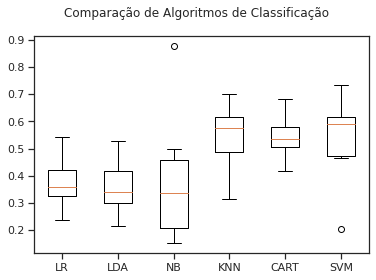

In [ ]:
## TUDO JUNTO
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [ ]:
dfp=pps.matrix(df1)
sns.heatmap(dfp,annot=True)
plt.show()

ValueError: ignored

In [ ]:
#Ajuste de hiperparâmetros
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Carregando os dados
#arquivo = 'data/pima-data.csv'
colunas = ['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]
#dados = read_csv(arquivo, names = colunas)
array = df1.values

# Separando o array em componentes de input e output
X = (array[:,0:16])
Y = (array[:,16])

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
seed = 7
iterations = 14

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

In [ ]:
# Salvando o modelo
# Salvando o resultado do seu trabalho
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelos/modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

In [ ]:
import missingno as msno
%matplotlib inline

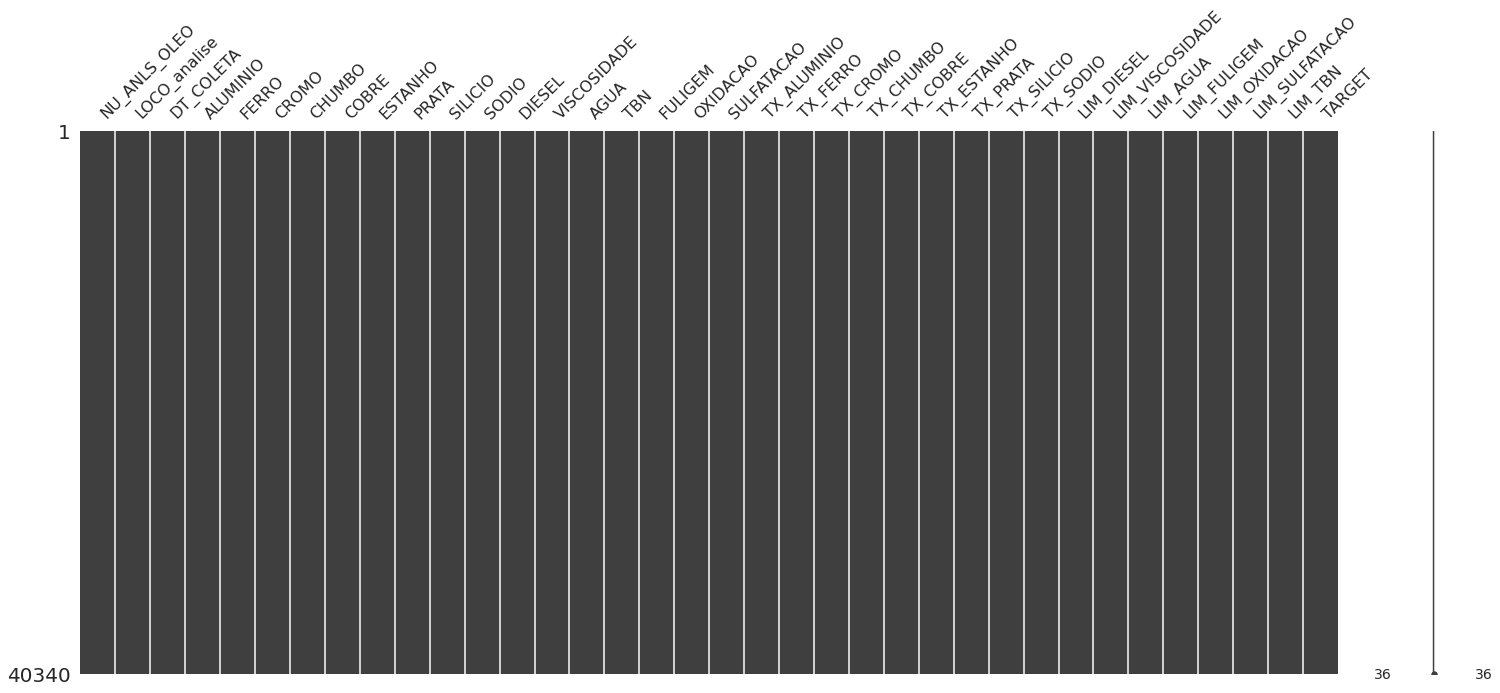

In [ ]:
msno.matrix(analise_tx)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


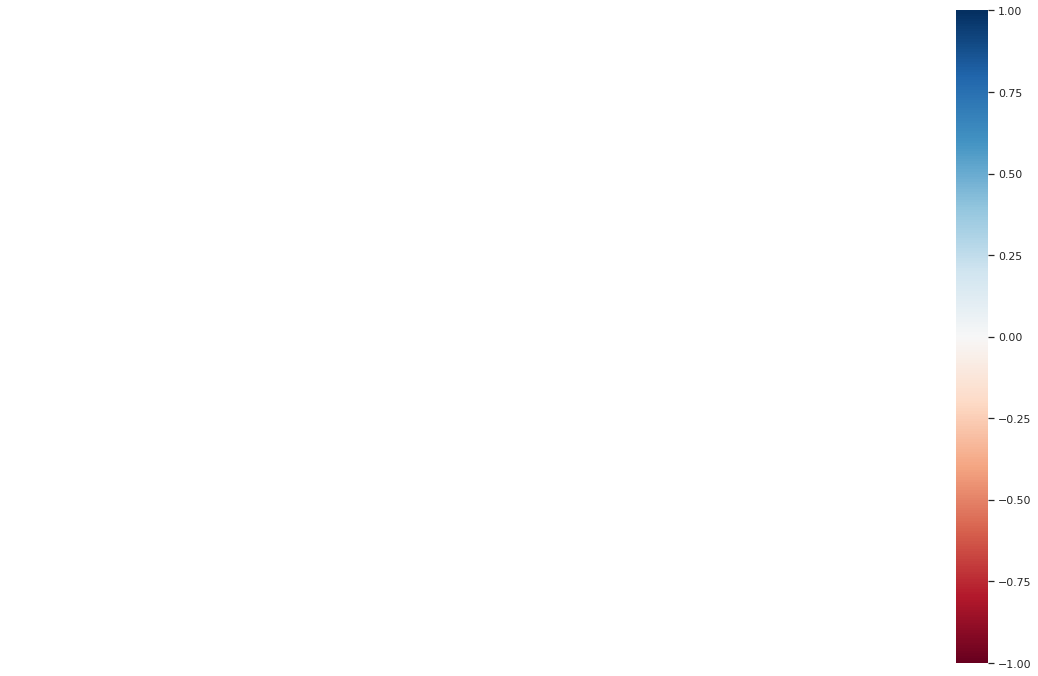

In [ ]:
msno.heatmap (analise_tx)

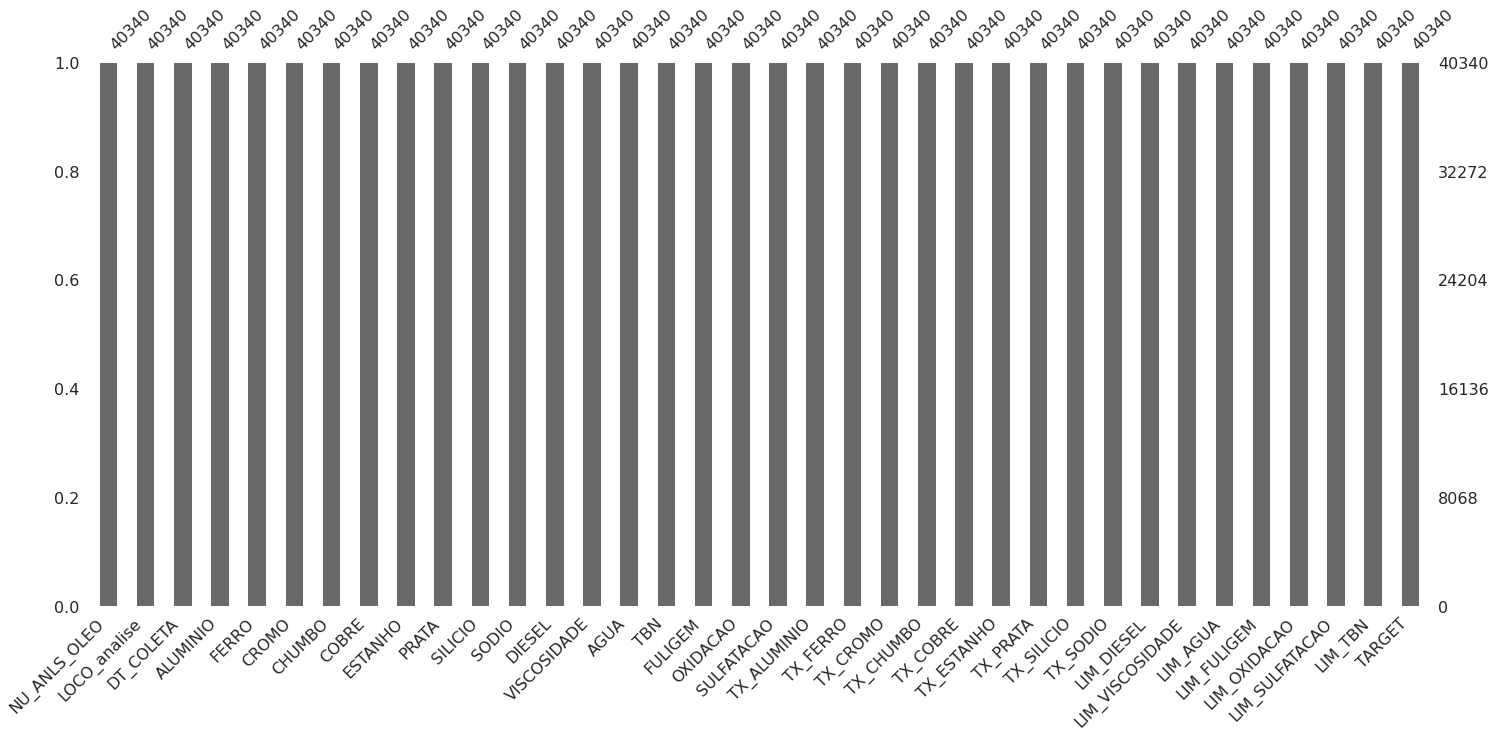

In [ ]:
msno.bar (analise_tx)

In [ ]:
analise.isna()

In [ ]:
analise.notna()

In [ ]:
analise.isna().any()

In [ ]:
analise.isna().sum()

In [ ]:
df.head

We can drop a row or column with missing values using dropna() function. how parameter is used to set condition to drop.
how=’any’ : drop if there is any missing value
how=’all’ : drop if all values are missing
Furthermore, using thresh parameter, we can set a threshold for missing values in order for a row/column to be dropped. axis parameter is used to select row (0) or column (1).

In [ ]:
df.dropna(axis = 0,how ='all',inplace = True)

In [ ]:
len(df)

In [ ]:
# Deleta as linhas que tem pelo menos um valor missing df.dropna(axis = 0,inplace=True)
# Deleta as linhas que tem pelo menos três valores missing df.dropna(axis = 0,thresh = 3 ,inplace=True)

In [ ]:
# df.fillna(25) preenche valores missing com o número 25
#média = df['IMDb'].mean() calcula a média da coluna
#df['IMDb'].fiilna(média) preenche valores missing com o valor da média da coluna

In [ ]:
#df.fillna(axis = 0 , method='ffill', limit = 1) preenche as linhas com valores de linhas seguintes , limit limita a quantidade de valores missing preenchidos
#df.fillna(axis = 0 , method='bfill') preenche as linhas com valores de linhas anteriores


Introduction to Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/automobile.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df['num-of-doors'].value_counts()

In [ ]:
sns.boxplot(x='num-of-cylinders',y='price',data=df)

In [ ]:
plt.scatter(df['engine-size'],df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [ ]:
count,bin_edges = np.histogram(df['peak-rpm'])
df['peak-rpm'].plot(kind='hist',xticks=bin_edges)
plt.xlabel('Value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()
plt.show()